# DAV 6150 Project 2 (Module 9)
_Mudassir Imam_

# Introduction

Retailers leverage vast amounts of data to optimize various aspects of their business, from fraud detection to personalized recommendations. One of the most crucial questions online retailers seek to answer is: will this website visitor make a purchase?

This research investigates the application of machine learning techniques to predict purchase behavior. We explore a dataset encompassing feature vectors from 12,330 unique user sessions, ensuring a diverse representation of user interactions over a year. By analyzing these features, such as page visits, product clicks, and time spent on specific pages, we aim to develop a model that can accurately predict whether a website visitor will ultimately convert into a paying customer.

This study sheds light on the effectiveness of machine learning in predicting purchase behavior. By identifying patterns and correlations within user data, we can potentially equip online retailers with valuable insights for optimizing their websites, marketing campaigns, and overall customer experience, ultimately leading to increased sales and improved customer satisfaction.

# Data Loading

In [1]:
# Import all the libraries
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set styling for the plots
sns.set_style('whitegrid')

In [2]:
# URL of raw dataset
url = "https://raw.githubusercontent.com/mimam786/DAV-6150/main/Project2/Project2_Data.csv"

# Read the data and store it in dataframe
df = pd.read_csv(url);

# Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip()

# Print the table
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.00,0,0.0,8,222.000000,0.000000,0.028571,53.474571,0.0,May,1,1,1,2,New_Visitor,True
1,0,0.00,0,0.0,14,1037.500000,0.014286,0.047619,0.000000,0.0,Mar,2,2,4,2,Returning_Visitor,False
2,4,37.50,2,82.0,4,96.625000,0.000000,0.017500,0.000000,0.0,Nov,2,2,9,2,New_Visitor,False
3,4,115.70,0,0.0,16,655.383333,0.000000,0.012037,0.000000,0.0,Nov,1,1,2,3,Returning_Visitor,False
4,1,60.00,1,15.0,26,670.166667,0.000000,0.003846,0.000000,0.0,May,2,2,3,4,Returning_Visitor,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,148.00,0,0.0,8,292.500000,0.000000,0.027273,0.000000,0.0,Mar,2,2,1,3,Returning_Visitor,True
12326,1,9.00,1,29.5,23,1157.583333,0.007692,0.053846,0.000000,0.0,Nov,2,2,7,2,Returning_Visitor,False
12327,0,0.00,0,0.0,91,4157.633333,0.010000,0.028013,0.000000,0.0,Jul,2,2,1,13,Returning_Visitor,False
12328,0,0.00,0,0.0,38,1417.666667,0.016117,0.048718,0.000000,1.0,May,2,6,3,6,Returning_Visitor,True


# Data Inspection

In [3]:
# Summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
# Statistical summary of the dataframe
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


# Pre-Clustering Exploratory Data Analysis

## General EDA

In [5]:
# Display data types of all the attributes
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
dtype: object

In [6]:
# Check for missing values in the dataset
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
dtype: int64

- There is no missing data

In [7]:
# Check for duplicated data
df.duplicated().sum()

125

- There are 125 duplicate rows in the dataset

## Univariate EDA

In [8]:
import scipy.stats as stats

# Generic function to calculate the skewness and check statistical description of numerical columns
def numeric_eda_summary(dataframe, column_name):
    skewness_value = stats.skew(dataframe[column_name])
    print(f"Skewness: {skewness_value: .2f}")
    return dataframe[column_name].describe()

# Generic function to plot histogram and boxplot for numerical columns
def numeric_eda_plot(dataframe, column_name, x_label):
    #Define the figure
    fig_1 = plt.figure(num = 1, figsize = (15,10))

    #Adjust the distance between the plots
    plt.subplots_adjust(hspace=1)
    
    # Plot definition for histogram
    plt.subplot(211) 
    plt.title(f"Histogram of {column_name}")
    sns.histplot(data = dataframe, x = column_name, kde = True)
    plt.xlabel(x_label)
    
    # Plot definition for boxplot
    plt.subplot(212)
    plt.title(f"Boxplot of {column_name}")
    sns.boxplot(data = dataframe, x = column_name)
    plt.xlabel(x_label)
    
#Generic function to plot countplot for categorical columns
def categorical_eda_plot(dataframe, column_name, title, x_label, y_label):
    # Plot definition for count plot
    sns.countplot(data = dataframe, x = column_name)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation = 90)
    
# Generic function to create summary for categorical columns    
def categorical_eda_summary(dataframe, column_name):
    summary = dataframe[column_name].value_counts().reset_index()
    summary.columns = ['Category', 'Count']
    summary['Percentage of Total'] = round((summary['Count'] / summary['Count'].sum()) * 100,2)
    return summary
    

### Administrative

In [9]:
numeric_eda_summary(df,'Administrative')

Skewness:  1.96


count    12330.000000
mean         2.315166
std          3.321784
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max         27.000000
Name: Administrative, dtype: float64

The average value of Administrator is 2.32. 25% is 0. 50% is 1. 75% is 4. The maximum value is 27 and minimum value is 0.

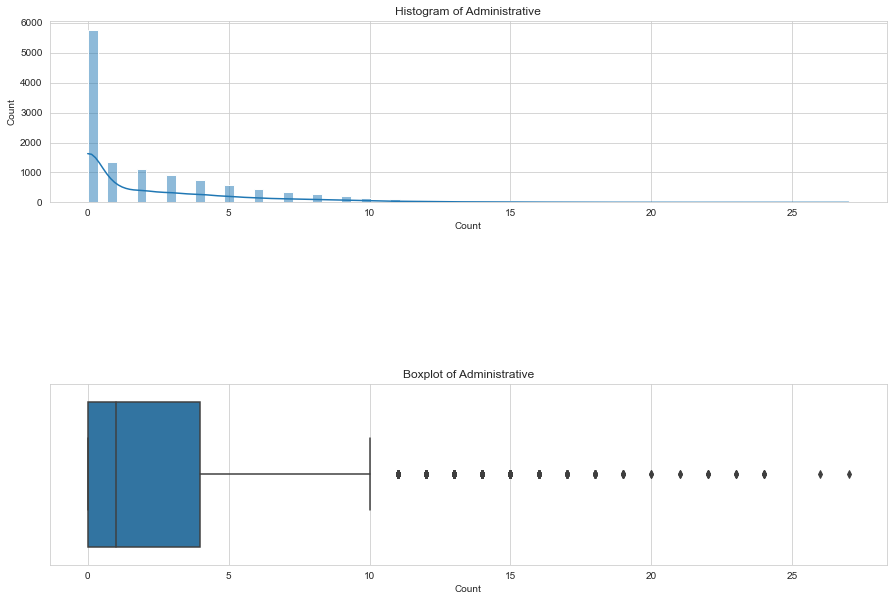

In [10]:
numeric_eda_plot(df, 'Administrative', 'Count')

- The histogram shows the distribution is right skewed with peak frequency at 0.
- The boxplot shows the median to be 1 and outliers post the value 10.

### Administrative_Duration

In [11]:
numeric_eda_summary(df,'Administrative_Duration')

Skewness:  5.62


count    12330.000000
mean        80.818611
std        176.779107
min          0.000000
25%          0.000000
50%          7.500000
75%         93.256250
max       3398.750000
Name: Administrative_Duration, dtype: float64

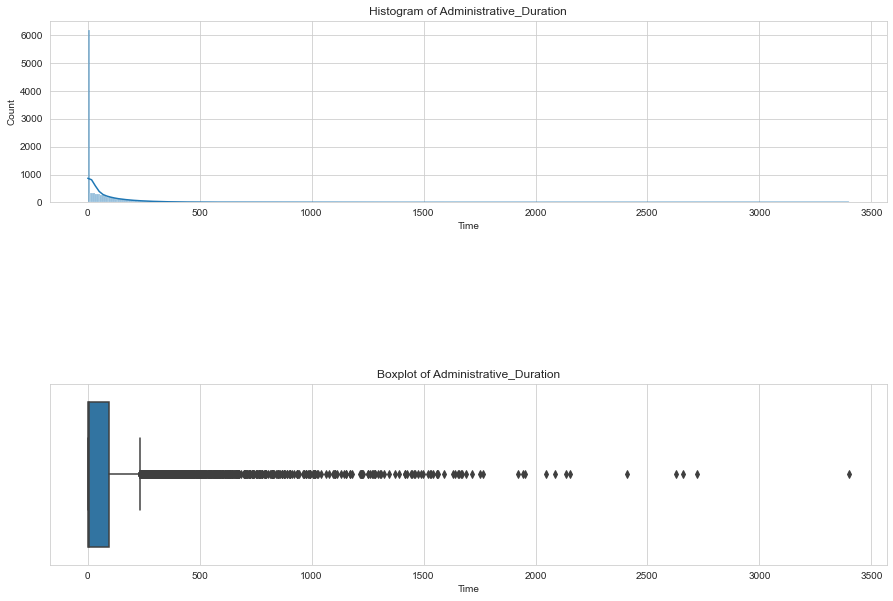

In [12]:
numeric_eda_plot(df, 'Administrative_Duration', 'Time')

- The histogram shows distribution as right skewed with peak frequency at 0.
- The box plot shows median to be very low, ie around 0 with very high outliers post 250.

### Informational

In [13]:
numeric_eda_summary(df,'Informational')

Skewness:  4.04


count    12330.000000
mean         0.503569
std          1.270156
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         24.000000
Name: Informational, dtype: float64

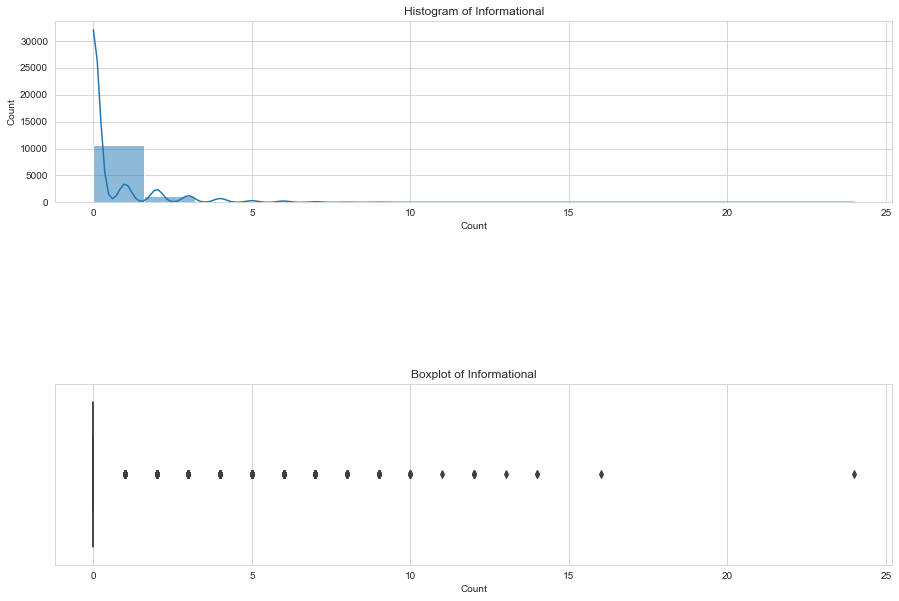

In [14]:
numeric_eda_plot(df, 'Informational', 'Count')

- The histogram shows distribution as right skewed with peak frequency at 0.
- The box plot shows median to be very low, ie 0 with maximum value to be around 24

### Informational_Duration

In [15]:
numeric_eda_summary(df,'Informational_Duration')

Skewness:  7.58


count    12330.000000
mean        34.472398
std        140.749294
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2549.375000
Name: Informational_Duration, dtype: float64

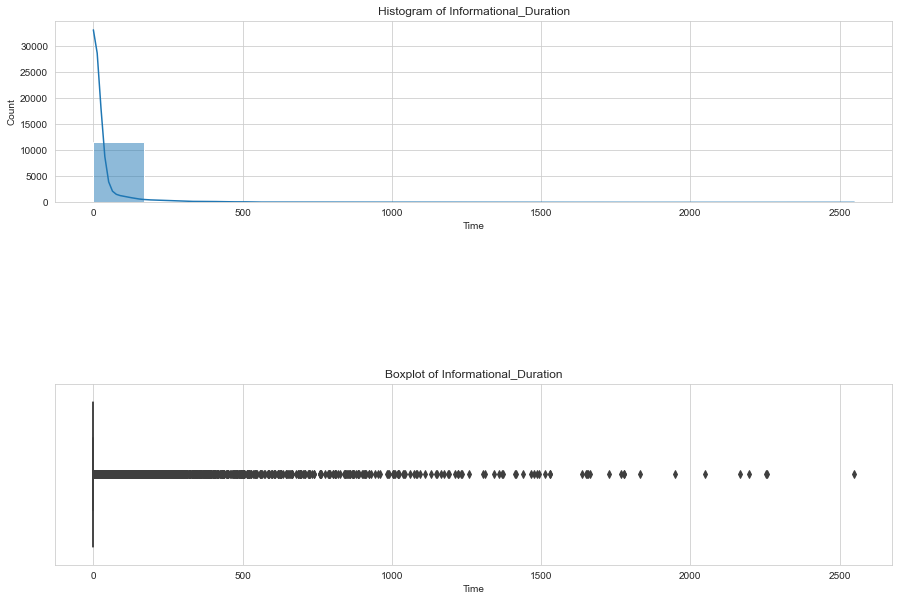

In [16]:
numeric_eda_plot(df, 'Informational_Duration', 'Time')

- The histogram shows distribution as right skewed with peak frequency at 0.
- The box plot shows median to be very low, ie around 0 with very high outliers, having maximum value more than 2500.

### ProductRelated

In [17]:
numeric_eda_summary(df,'ProductRelated')

Skewness:  4.34


count    12330.000000
mean        31.731468
std         44.475503
min          0.000000
25%          7.000000
50%         18.000000
75%         38.000000
max        705.000000
Name: ProductRelated, dtype: float64

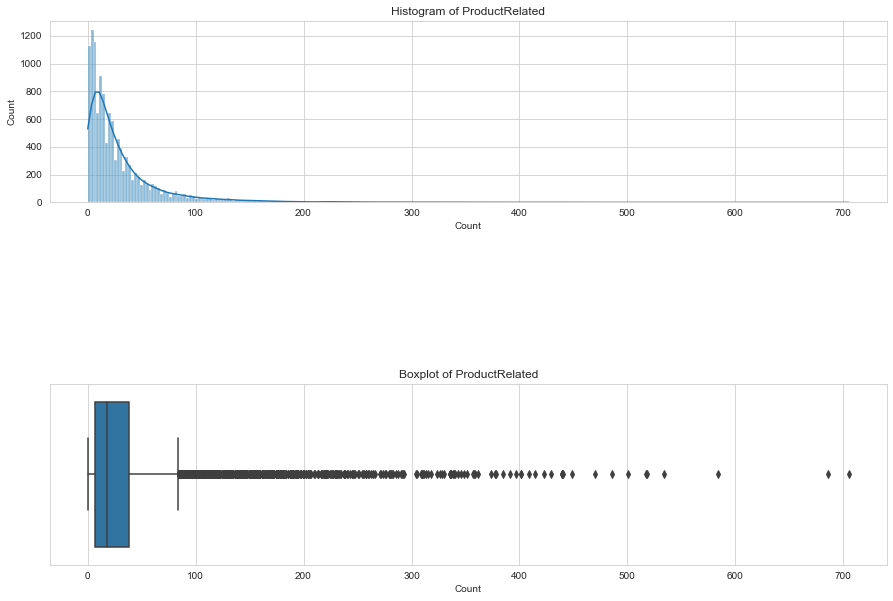

In [18]:
numeric_eda_plot(df, 'ProductRelated', 'Count')

- The histogram shows distribution as right skewed with peak frequency at around 18.
- The box plot shows median to be around 18 with very high outliers post 90, having maximum value to be 705

### ProductRelated_Duration

In [19]:
numeric_eda_summary(df,'ProductRelated_Duration')

Skewness:  7.26


count    12330.000000
mean      1194.746220
std       1913.669288
min          0.000000
25%        184.137500
50%        598.936905
75%       1464.157214
max      63973.522230
Name: ProductRelated_Duration, dtype: float64

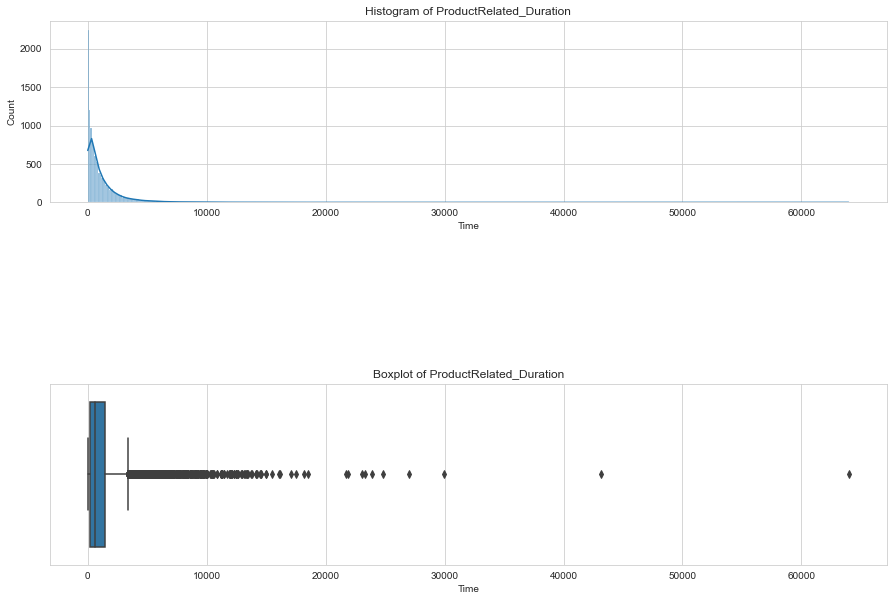

In [20]:
numeric_eda_plot(df, 'ProductRelated_Duration', 'Time')

- The histogram shows distribution as right skewed with peak frequency at around 600
- The box plot shows median to be around 18 with very high outliers post around 3000, having maximum value to be arond 64000

### BounceRates

In [21]:
numeric_eda_summary(df,'BounceRates')

Skewness:  2.95


count    12330.000000
mean         0.022191
std          0.048488
min          0.000000
25%          0.000000
50%          0.003112
75%          0.016813
max          0.200000
Name: BounceRates, dtype: float64

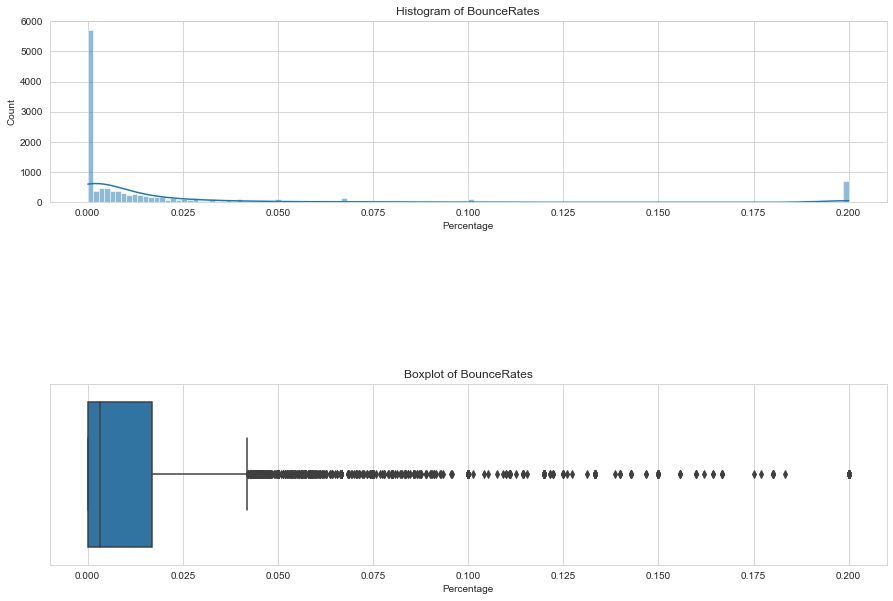

In [22]:
numeric_eda_plot(df, 'BounceRates', 'Percentage')

- The histogram shows distribution as right skewed with peak frequency at around 0
- The box plot shows median to be around 0 with outliers post around 0.040, having maximum value to be around 0.2

### ExitRates

In [23]:
numeric_eda_summary(df,'ExitRates')

Skewness:  2.15


count    12330.000000
mean         0.043073
std          0.048597
min          0.000000
25%          0.014286
50%          0.025156
75%          0.050000
max          0.200000
Name: ExitRates, dtype: float64

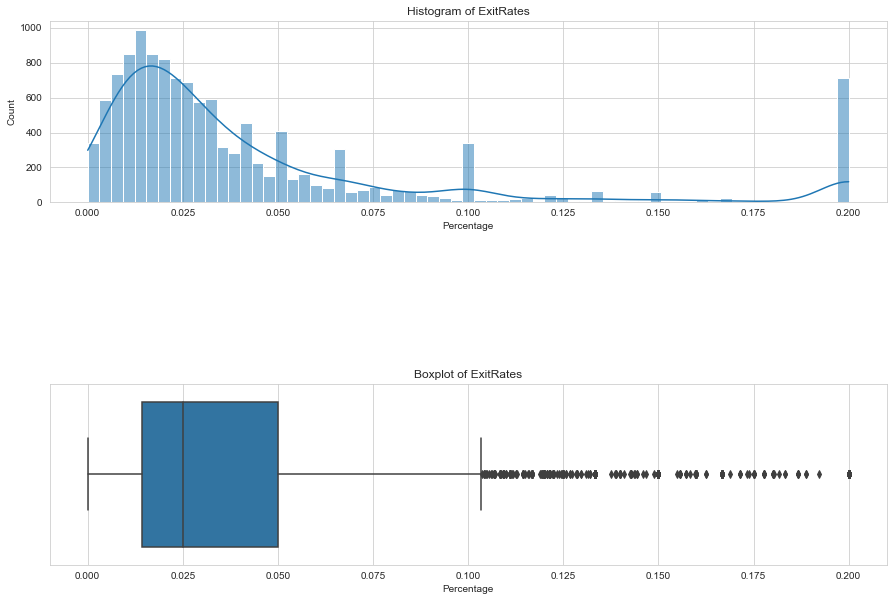

In [24]:
numeric_eda_plot(df, 'ExitRates', 'Percentage')

- The histogram shows distribution as right skewed with peak frequency at around 0.02
- The box plot shows median to be around 0.025 with outliers post around 0.105, having maximum value to be around 0.200

### PageValues

In [25]:
numeric_eda_summary(df,'PageValues')

Skewness:  6.38


count    12330.000000
mean         5.889258
std         18.568437
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        361.763742
Name: PageValues, dtype: float64

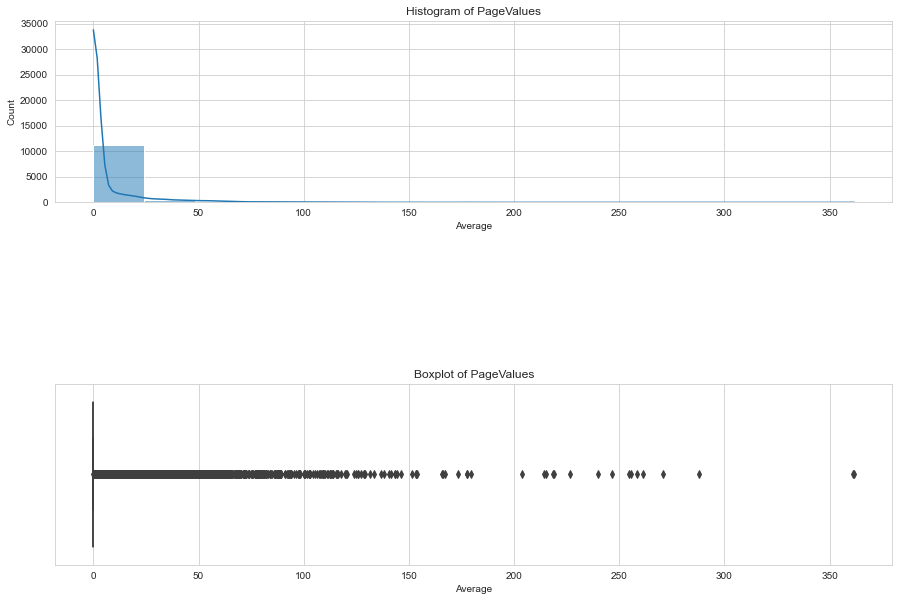

In [26]:
numeric_eda_plot(df, 'PageValues', 'Average')

- The histogram shows distribution as right skewed with peak frequency at around 0
- The box plot shows median to be 0 with maximum value to be around 360

### SpecialDay

In [27]:
numeric_eda_summary(df,'SpecialDay')

Skewness:  3.30


count    12330.000000
mean         0.061427
std          0.198917
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: SpecialDay, dtype: float64

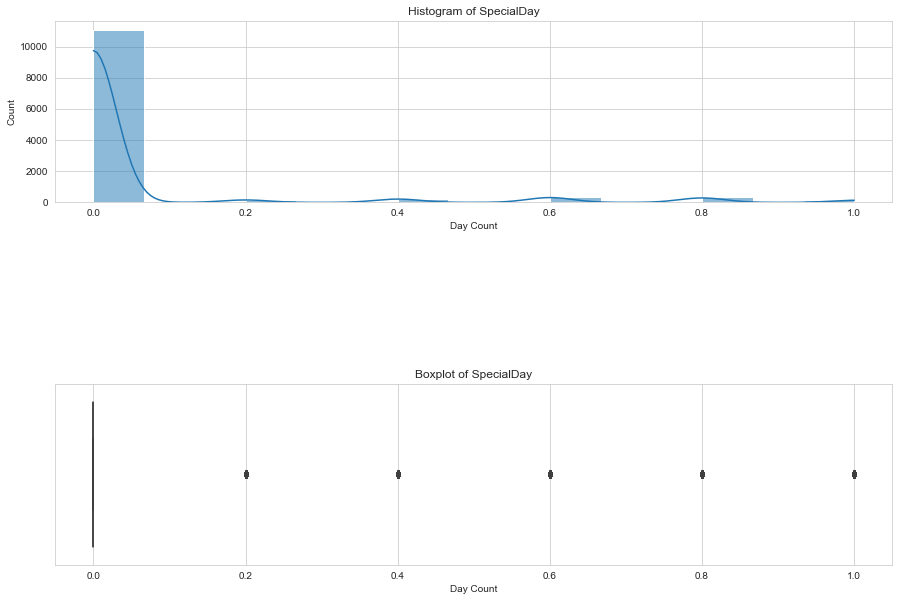

In [28]:
numeric_eda_plot(df, 'SpecialDay', 'Day Count')

- The distribution appears to be heavily skewed to the right, indicating that there are many instances with low “Day Count” values and relatively few instances with high values.
- The boxplot shows the median at 0 with maximum value to be 1

### OperatingSystems

In [29]:
categorical_eda_summary(df,'OperatingSystems')

,Category,Count,Percentage of Total
0,2,6601,53.54
1,1,2585,20.97
2,3,2555,20.72
3,4,478,3.88
4,8,79,0.64
5,6,19,0.15
6,7,7,0.06
7,5,6,0.05


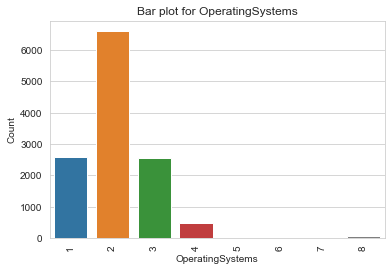

In [30]:
categorical_eda_plot(df, 'OperatingSystems', "Bar plot for OperatingSystems", 'OperatingSystems', 'Count')

- This graph provides a clear comparison of user counts across different operating systems, emphasizing the popularity of the second one.

### Browser

In [31]:
categorical_eda_summary(df,'Browser')

,Category,Count,Percentage of Total
0,2,7961,64.57
1,1,2462,19.97
2,4,736,5.97
3,5,467,3.79
4,6,174,1.41
5,10,163,1.32
6,8,135,1.09
7,3,105,0.85
8,13,61,0.49
9,7,49,0.40


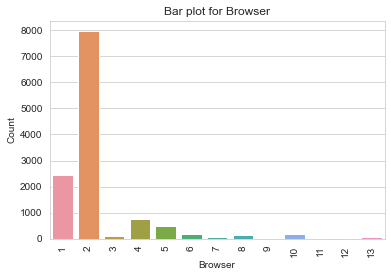

In [32]:
categorical_eda_plot(df, 'Browser', "Bar plot for Browser", 'Browser', 'Count')

- This graph provides a clear comparison of browser popularity, emphasizing the dominance of second browser.

### Region

In [33]:
categorical_eda_summary(df,'Region')

,Category,Count,Percentage of Total
0,1,4780,38.77
1,3,2403,19.49
2,4,1182,9.59
3,2,1136,9.21
4,6,805,6.53
5,7,761,6.17
6,9,511,4.14
7,8,434,3.52
8,5,318,2.58


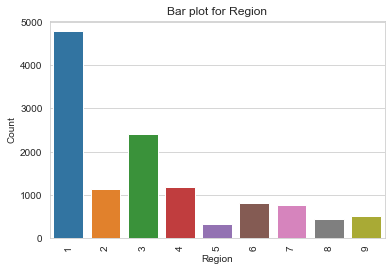

In [34]:
categorical_eda_plot(df, 'Region', "Bar plot for Region", 'Region', 'Count')

- This graph provides a clear comparison of counts across different regions, with region 1 having the most purchasing power.

### TrafficType

In [35]:
categorical_eda_summary(df,'TrafficType')

,Category,Count,Percentage of Total
0,2,3913,31.74
1,1,2451,19.88
2,3,2052,16.64
3,4,1069,8.67
4,13,738,5.99
5,10,450,3.65
6,6,444,3.60
7,8,343,2.78
8,5,260,2.11
9,11,247,2.00


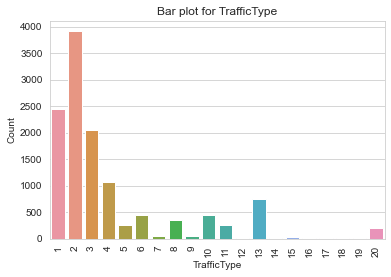

In [36]:
categorical_eda_plot(df, 'TrafficType', "Bar plot for TrafficType", 'TrafficType', 'Count')

- This graph provides a clear visualization of the distribution of various traffic types. traffic type 2 has an unusually high count compared to the others, which could be indicative of its prevalence or significance.

### Month

In [37]:
categorical_eda_summary(df, 'Month')

,Category,Count,Percentage of Total
0,May,3364,27.28
1,Nov,2998,24.31
2,Mar,1907,15.47
3,Dec,1727,14.01
4,Oct,549,4.45
5,Sep,448,3.63
6,Aug,433,3.51
7,Jul,432,3.50
8,June,288,2.34
9,Feb,184,1.49


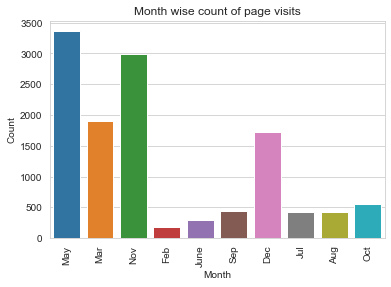

In [38]:
categorical_eda_plot(df, 'Month', "Month wise count of page visits", 'Month', 'Count')

- The varying heights of the bars indicate the number of page visits for each month. May month having the highest page visit.

### VisitorType

In [39]:
categorical_eda_summary(df, 'VisitorType')

,Category,Count,Percentage of Total
0,Returning_Visitor,10551,85.57
1,New_Visitor,1694,13.74
2,Other,85,0.69


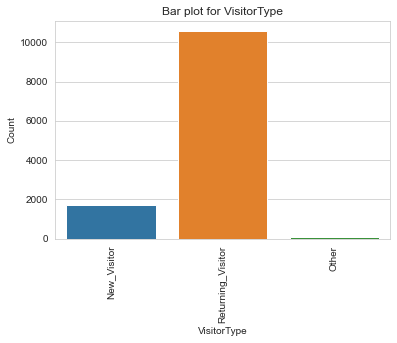

In [40]:
categorical_eda_plot(df, 'VisitorType', "Bar plot for VisitorType", 'VisitorType', 'Count')

- This graph highlights the dominance of returning customers, as they significantly outnumber new visitors or others in this particular dataset

### Weekend

In [41]:
categorical_eda_summary(df, 'Weekend')

,Category,Count,Percentage of Total
0,False,9462,76.74
1,True,2868,23.26


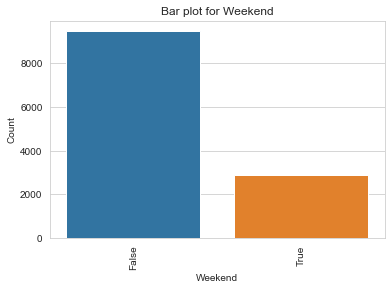

In [42]:
categorical_eda_plot(df, 'Weekend', "Bar plot for Weekend", 'Weekend', 'Count')

- This graph visually represents a significant difference in counts between weekends and non-weekends, showing higher page visits on weekdays.

## Bivariate Analysis

In [43]:
# Generic function for Numerical vs Numerical variables plot
def numeric_numeric_plot(dataframe, x_column, y_column, title):
    plt.figure(figsize = (10,8))
    sns.scatterplot(x=x_column, y=y_column, data = dataframe)
    plt.title(title)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.grid(True)
    plt.show()
    
# Generic function for Categorical vs Numerical variable plot
def categorical_numeric_plot(dataframe, x_column, y_column, title):
    plt.figure(figsize = (15,10))
    # Create a violin plot
    sns.violinplot(x=x_column, y=y_column, data=dataframe)
    # Add labels and title
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(title)
    # Show the plot
    plt.show()

# Generic function for Categorical vs Numerical variable summary
def categorical_numeric_summary(dataframe, numeric_column, categorical_column):
    # Group data by the categorical variable
    grouped_data = dataframe.groupby(categorical_column)
    # Calculate descriptive statistics for the numeric column within each group
    description = grouped_data[numeric_column].describe()
    # Rename the index to match the categorical column
    description.index.name = categorical_column   
    # Transpose the DataFrame
    description_transposed = description.T
    return description_transposed

### BounceRates vs ProductRelated_Duration

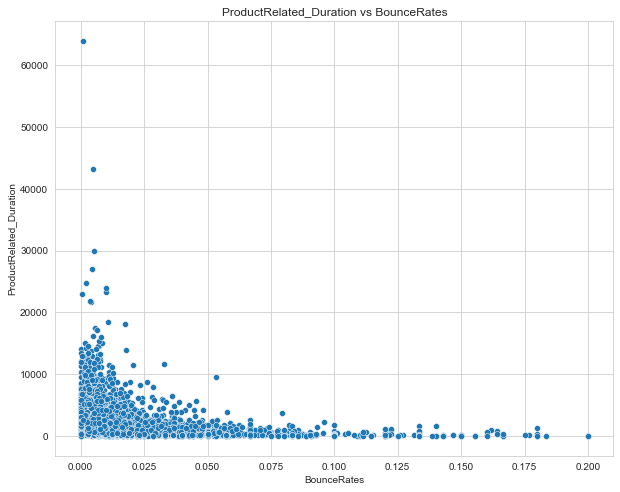

In [44]:
numeric_numeric_plot(df, 'BounceRates', 'ProductRelated_Duration', 'ProductRelated_Duration vs BounceRates')

- **ProductRelated Duration:** Represents the time users spend on product-related pages.
- **Bounce Rates:** Indicates the percentage of visitors who leave a website after viewing only one page.
- There is a concentration of data points at the lower end, suggesting that as Bounce Rates increase, the ProductRelated Duration tends to decrease.

### ExitRates vs ProductRelated_Duration

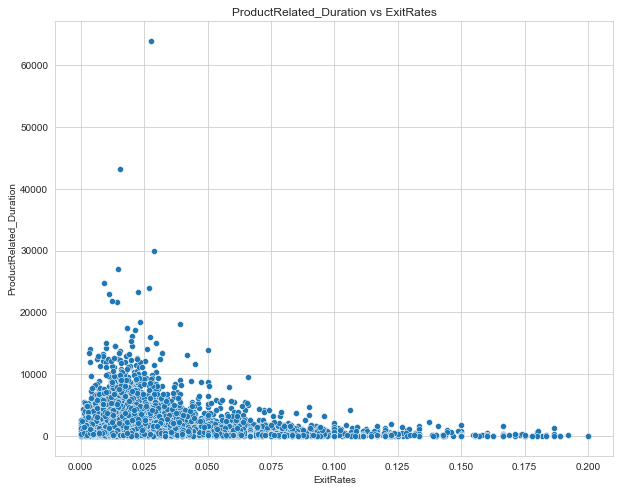

In [45]:
numeric_numeric_plot(df, 'ExitRates', 'ProductRelated_Duration', 'ProductRelated_Duration vs ExitRates')

- **ProductRelated Duration:** Represents the time users spend on product-related pages.
- **Exit Rates:** Indicates the percentage of visitors who leave a website from specific pages
- There is a concentration of data points at the lower end, suggesting that as ProductRelated Duration increases, Exit Rates tend to decrease.

### ExitRates vs BounceRates

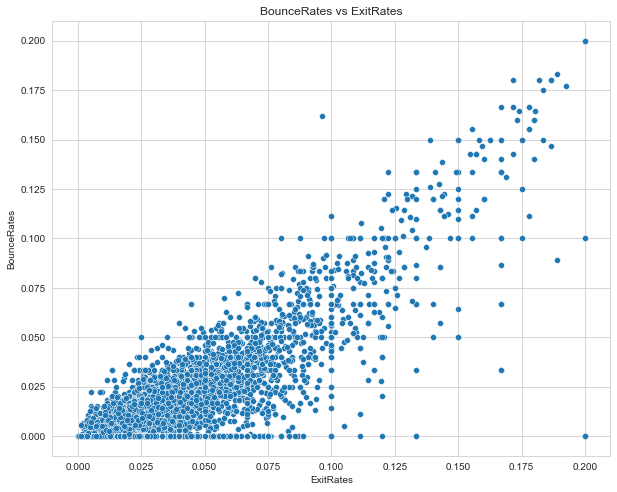

In [46]:
numeric_numeric_plot(df, 'ExitRates', 'BounceRates', 'BounceRates vs ExitRates')

- **Bounce Rates:** Indicates the percentage of visitors who leave a website after viewing only one page.
- **Exit Rates:** Indicates the percentage of visitors who leave a specific page after viewing it.
- There is a concentration of blue dots at the lower end. As Bounce Rates increase, Exit Rates tend to increase, indicationg high correlation.

### Month vs ExitRates

In [47]:
categorical_numeric_summary(df, 'ExitRates', 'Month')

Month,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep
count,433.000000,1727.000000,184.000000,432.000000,288.000000,1907.000000,3364.000000,2998.000000,549.000000,448.000000
mean,0.037727,0.041303,0.074148,0.045330,0.058242,0.044600,0.048850,0.038202,0.029011,0.030320
std,0.042575,0.047152,0.069020,0.046992,0.056673,0.051733,0.051543,0.045130,0.031114,0.031643
min,0.000000,0.000505,0.001795,0.000000,0.000000,0.000176,0.000263,0.000000,0.000000,0.000000
25%,0.011111,0.014675,0.019917,0.015385,0.018887,0.012850,0.015425,0.014197,0.010526,0.012014
50%,0.023913,0.025000,0.048467,0.031925,0.037713,0.025000,0.029595,0.023242,0.020188,0.020688
75%,0.047619,0.044623,0.100000,0.052539,0.075000,0.050000,0.058343,0.040000,0.036000,0.037232
max,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000


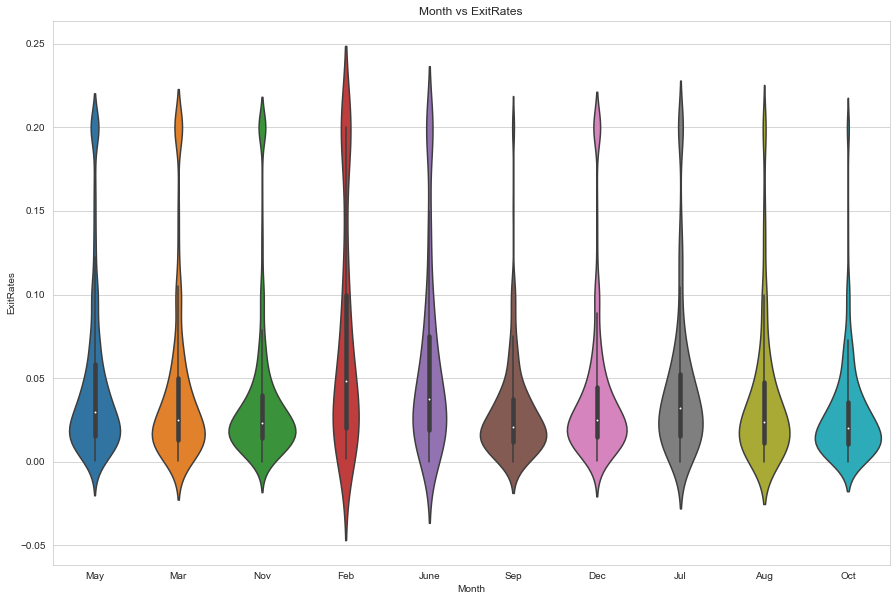

In [48]:
categorical_numeric_plot(df, 'Month', 'ExitRates', 'Month vs ExitRates')

- Violin plots provide insights into data variability and density at different levels. In this case, the plot visually represents how ExitRates vary across various months.
- White dot represents the median and black bar represents the inter-quartile range.
- May: Concentration around 0.05 and another smaller one around 0.15. Indicates that exit rates tend to cluster around these values during May.
- June: Broader distribution with concentrations around 0.05 and 0.15. More variability in exit rates compared to May.
- July: Narrower plot, indicating less variation in exit rates. Exit rates are relatively consistent during July.
- August: Significant concentration around 0.1. Indicates a common exit rate value during August.
- September: Two noticeable concentrations at approximately 0.05 and 0.2. Exit rates vary between these two values.
- October: Similar to June but with less density at higher exit rates. Indicates a range of exit rates during October.
- May and September exhibit more variability, while July and August show more consistent exit rates.

### Month vs BounceRates

In [49]:
categorical_numeric_summary(df, 'BounceRates', 'Month')

Month,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep
count,433.000000,1727.000000,184.000000,432.000000,288.000000,1907.000000,3364.000000,2998.000000,549.000000,448.000000
mean,0.018211,0.020149,0.047021,0.024676,0.035102,0.021728,0.026867,0.019259,0.011849,0.012183
std,0.038883,0.047736,0.076307,0.045993,0.058945,0.051848,0.051796,0.045071,0.027985,0.029211
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.003704,0.001449,0.002504,0.007692,0.010000,0.000000,0.005128,0.003922,0.000000,0.000000
75%,0.016923,0.014039,0.050000,0.024171,0.035758,0.013333,0.023949,0.013976,0.012667,0.011976
max,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000


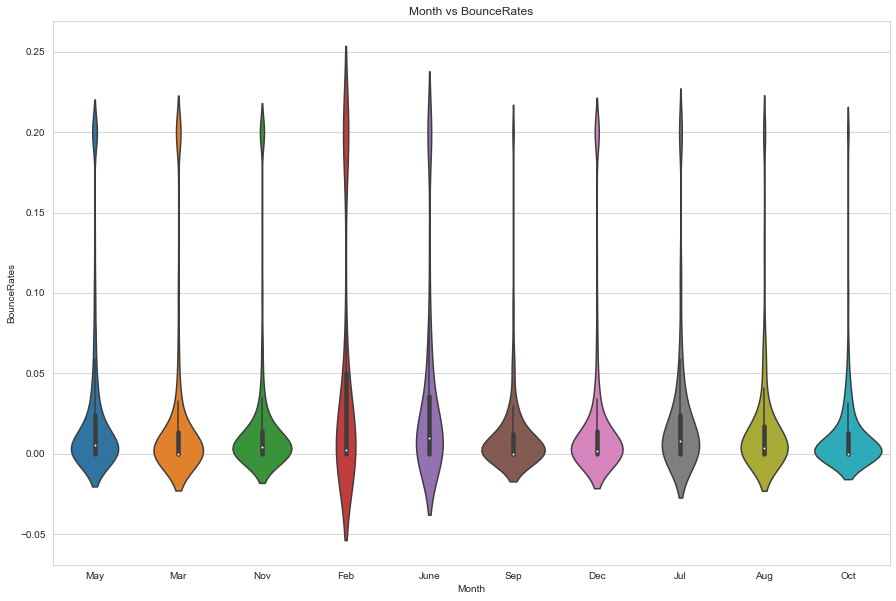

In [50]:
categorical_numeric_plot(df, 'Month', 'BounceRates', 'Month vs BounceRates')

- May: Concentration around 0.05 and another smaller one around 0.15. Indicates that exit rates tend to cluster around these values during May.
- Mar: A wider distribution with bounce rates primarily between 0.00 and 0.15. More variability in exit rates compared to May.
- Nov: Bounce rates are concentrated around 0.05 but extend up to approximately 0.20. Indicates variability in exit rates during November.
- Feb: A narrow distribution with most bounce rates close to 0.20. Indicates a common exit rate value during February.
- June: Bounce rates vary widely, with a concentration around both low and high extremes. Indicates significant variability in user behavior during June.
- Sep: Most bounce rates are clustered around 0.05 but have a spread up to about 0.15. Indicates moderate variability in exit rates during September.
- Dec: A narrower distribution centered approximately at 0.10. Indicates relatively consistent exit rates during December.
- Jul: Bounce rate has a broad spread but is mostly concentrated around 0.05. Indicates moderate variability in user engagement during July.
- Aug: The distribution is wide with concentrations at both lower and upper extremes of the range. Indicates significant variation in exit rates during August.
- Oct: Similar to June but with less density at higher exit rates. Indicates variability in user behavior during October.

### Browser vs ExitRates

In [51]:
categorical_numeric_summary(df, 'ExitRates', 'Browser')

Browser,1,2,3,4,5,6,7,8,9,10,11,12,13
count,2462.000000,7961.000000,105.000000,736.000000,467.000000,174.000000,49.000000,135.000000,1.00,163.000000,6.000000,10.000000,61.000000
mean,0.046749,0.041927,0.058552,0.039741,0.042367,0.043415,0.044171,0.052574,0.05,0.037836,0.043915,0.050337,0.052842
std,0.053018,0.047062,0.060709,0.046864,0.045622,0.044200,0.051903,0.056509,NaN,0.042926,0.033332,0.047484,0.068493
min,0.000000,0.000000,0.003333,0.000000,0.000000,0.000000,0.001042,0.000000,0.05,0.002051,0.009524,0.006897,0.001250
25%,0.014506,0.014286,0.017521,0.011765,0.014784,0.016842,0.016071,0.015470,0.05,0.011270,0.023016,0.012946,0.008696
50%,0.026667,0.025000,0.032793,0.023991,0.028000,0.028203,0.023529,0.034661,0.05,0.022222,0.030556,0.027194,0.025000
75%,0.052479,0.047826,0.072727,0.044881,0.050000,0.051210,0.050000,0.057407,0.05,0.045960,0.072619,0.090909,0.050000
max,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.05,0.200000,0.085714,0.133333,0.200000


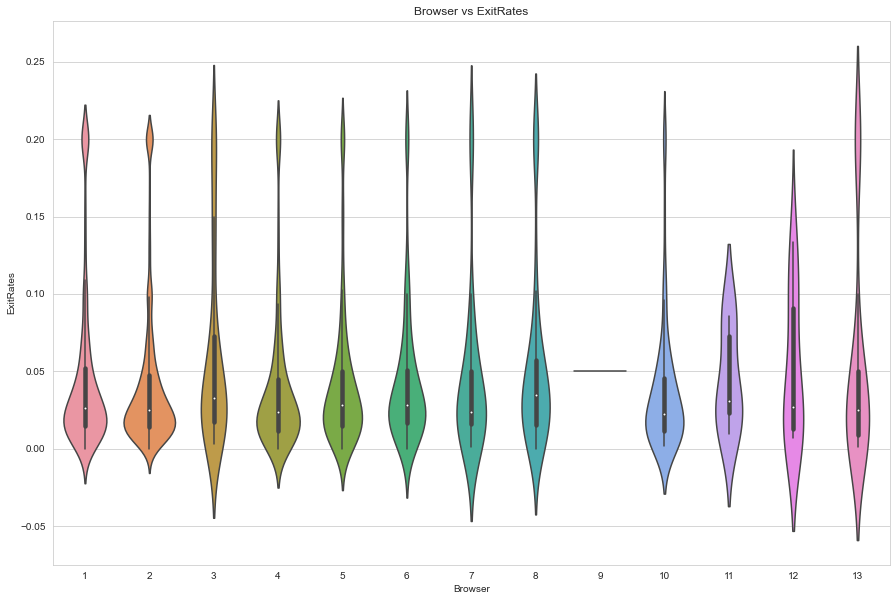

In [52]:
categorical_numeric_plot(df, 'Browser', 'ExitRates', 'Browser vs ExitRates')

- The width of each “violin” at different exit rate values indicates the density or frequency of data points at that level. A wider section means more data points at that exit rate, while a narrower section means fewer.
- Browser 2 has a wide section around an exit rate of 0.05, indicating many users exited webpages at this rate when using this browser.

### Browser vs BounceRates

In [53]:
categorical_numeric_summary(df, 'BounceRates', 'Browser')

Browser,1,2,3,4,5,6,7,8,9,10,11,12,13
count,2462.000000,7961.000000,105.000000,736.000000,467.000000,174.000000,49.000000,135.000000,1.00,163.000000,6.000000,10.000000,61.000000
mean,0.026173,0.021365,0.037603,0.017155,0.019643,0.018483,0.021283,0.031124,0.02,0.014914,0.013095,0.025857,0.034373
std,0.054119,0.046533,0.061437,0.045567,0.045118,0.043041,0.054511,0.059969,NaN,0.040203,0.021389,0.037392,0.074365
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.02,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.02,0.000000,0.000000,0.000000,0.000000
50%,0.004082,0.003448,0.005714,0.000000,0.001754,0.004307,0.000000,0.004762,0.02,0.000000,0.000000,0.003529,0.000000
75%,0.019483,0.017123,0.050000,0.009524,0.014286,0.015110,0.013333,0.026786,0.02,0.009762,0.021429,0.054545,0.000000
max,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.02,0.200000,0.050000,0.100000,0.200000


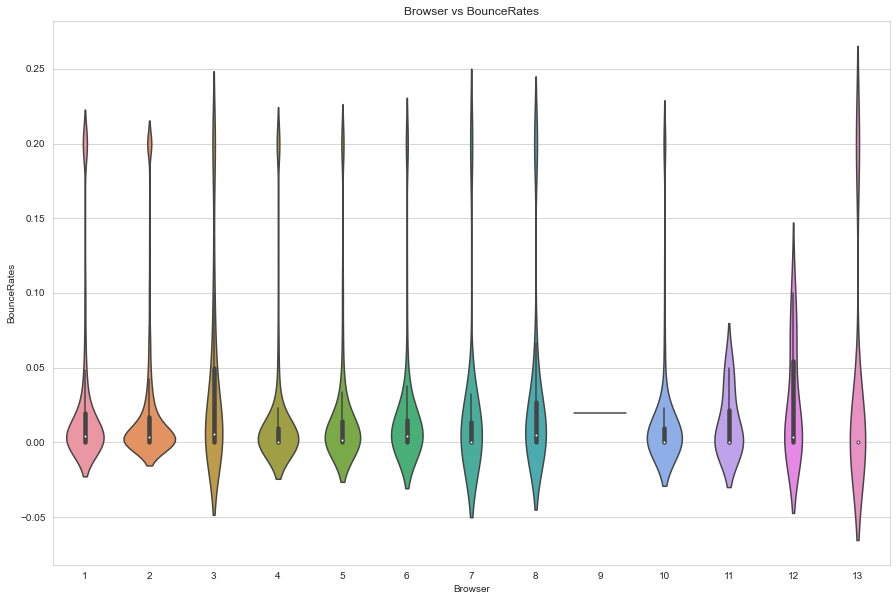

In [54]:
categorical_numeric_plot(df, 'Browser', 'BounceRates', 'Browser vs BounceRates')

- The width of the plot at different bounce rate values indicates the concentration of data points at those rates.
- Browser 1 has a relatively low bounce rate, as indicated by the narrow plot.
- Browsers 5, 7, and 10 have wider plots, suggesting more variability in bounce rates.
- Browser 13 has a high bounce rate, as shown by the extended tail on the right side of its plot.

### Region vs ExitRates

In [55]:
categorical_numeric_summary(df, 'ExitRates', 'Region')

Region,1,2,3,4,5,6,7,8,9
count,4780.000000,1136.000000,2403.000000,1182.000000,318.000000,805.000000,761.000000,434.000000,511.000000
mean,0.043127,0.043049,0.043889,0.044091,0.040745,0.044062,0.039804,0.040037,0.043759
std,0.048665,0.049092,0.048338,0.049794,0.049103,0.048106,0.046990,0.043735,0.051893
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.014286,0.013333,0.014933,0.013333,0.012500,0.014926,0.013333,0.015452,0.013199
50%,0.025000,0.025986,0.026389,0.026667,0.022832,0.027778,0.024286,0.025034,0.025309
75%,0.050000,0.050000,0.050000,0.050000,0.043296,0.050000,0.043590,0.045205,0.050000
max,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000


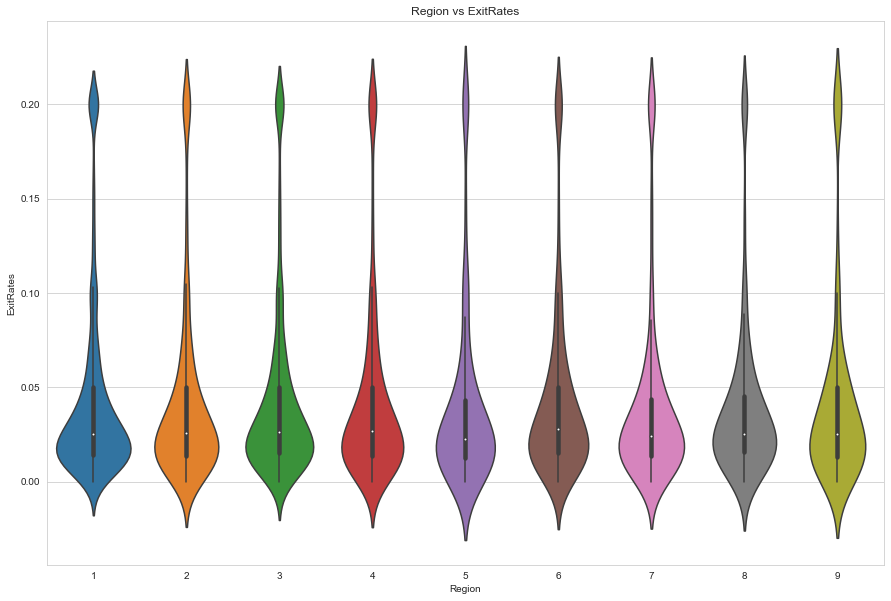

In [56]:
categorical_numeric_plot(df, 'Region', 'ExitRates', 'Region vs ExitRates')

- The white dot within each plot signifies the median exit rate for that specific region.
- Region 1: Has a relatively low exit rate, as indicated by the narrow plot.
- Regions 5, 7, and 9: Exhibit wider plots, suggesting greater variability in exit rates.
- Region 9: Shows a high exit rate, as evidenced by the extended tail on the right side of its plot.

### Region vs BounceRates

In [57]:
categorical_numeric_summary(df, 'BounceRates', 'Region')

Region,1,2,3,4,5,6,7,8,9
count,4780.000000,1136.000000,2403.000000,1182.000000,318.000000,805.000000,761.000000,434.000000,511.000000
mean,0.022090,0.022886,0.022475,0.023176,0.020703,0.023721,0.020387,0.019223,0.021711
std,0.048215,0.049137,0.048176,0.049718,0.047888,0.048343,0.047431,0.044106,0.053752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.003239,0.003175,0.003774,0.003125,0.001325,0.004167,0.001869,0.003419,0.000000
75%,0.016667,0.018242,0.017857,0.018182,0.015385,0.022222,0.015152,0.015385,0.011657
max,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000


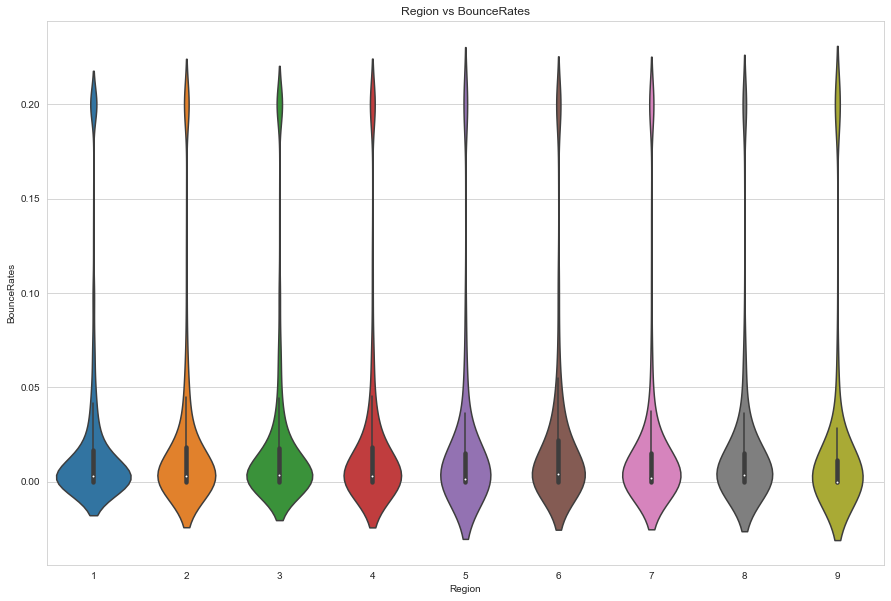

In [58]:
categorical_numeric_plot(df, 'Region', 'BounceRates', 'Region vs BounceRates')

- The white dot within each plot signifies the median bounce rate for that region.
- Region 1: Has a relatively low bounce rate, as indicated by the narrow plot.
- Regions 5, 7, and 9: Exhibit wider plots, suggesting greater variability in bounce rates.
- Region 9: Shows a high bounce rate, as evidenced by the extended tail on the right side of its plot.

### VisitorType vs ExitRates

In [59]:
categorical_numeric_summary(df, 'ExitRates', 'VisitorType')

VisitorType,New_Visitor,Other,Returning_Visitor
count,1694.000000,85.000000,10551.000000
mean,0.020681,0.063349,0.046505
std,0.028727,0.071112,0.049916
min,0.000000,0.000667,0.000000
25%,0.006897,0.011111,0.016071
50%,0.013333,0.033333,0.028331
75%,0.024691,0.100000,0.052440
max,0.200000,0.200000,0.200000


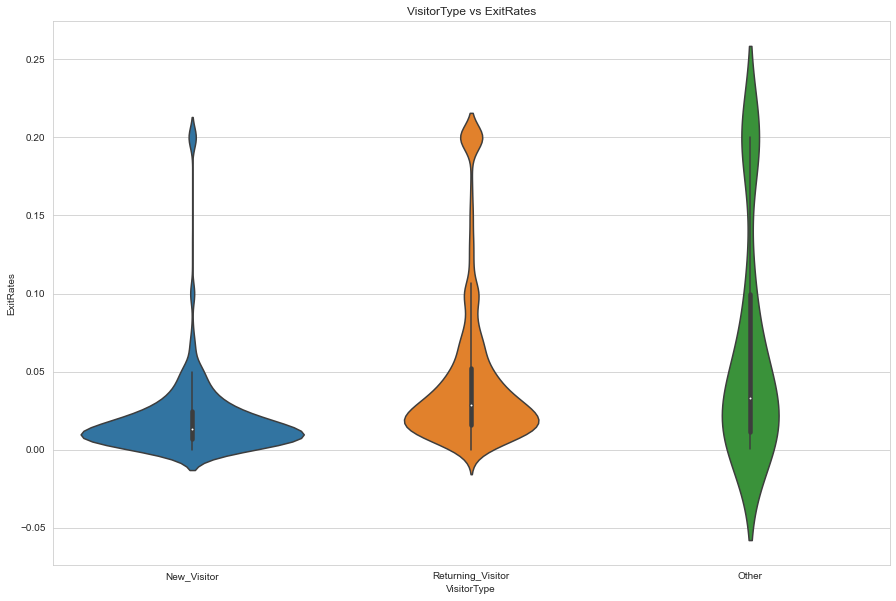

In [60]:
categorical_numeric_plot(df, 'VisitorType', 'ExitRates', 'VisitorType vs ExitRates')

- The y-axis represents the exit rate, which indicates the percentage of visitors who leave a website after viewing a page.
- New Visitor: Has a relatively low exit rate, as indicated by the narrow blue plot.
- Returning Visitor: Shows moderate variability in exit rates, with a wider orange plot.
- Other: Exhibits a higher exit rate, as evidenced by the extended tail on the right side of the green plot.

### VisitorType vs BounceRates

In [61]:
categorical_numeric_summary(df, 'BounceRates', 'VisitorType')

VisitorType,New_Visitor,Other,Returning_Visitor
count,1694.000000,85.000000,10551.000000
mean,0.005261,0.038551,0.024778
std,0.026312,0.078438,0.050325
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.005263
75%,0.000000,0.000000,0.020000
max,0.200000,0.200000,0.200000


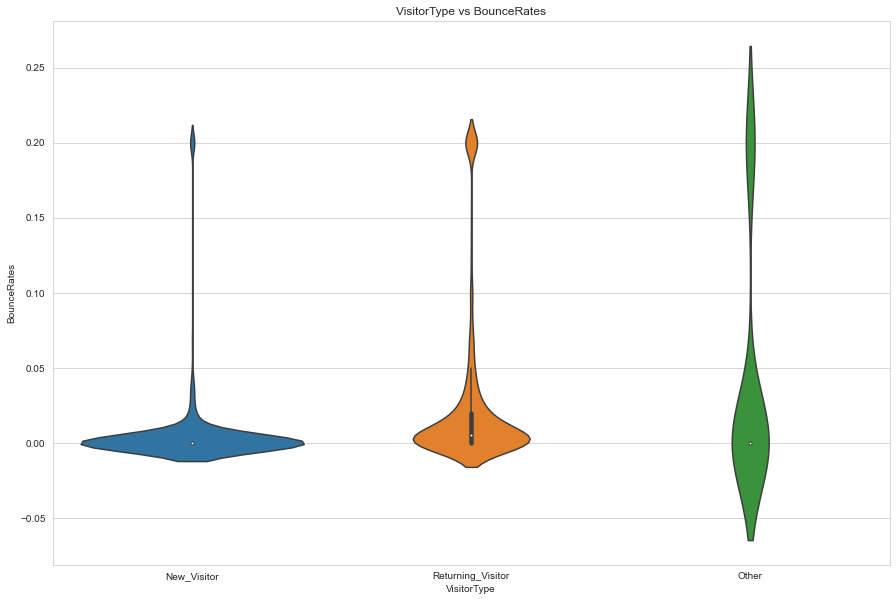

In [62]:
categorical_numeric_plot(df, 'VisitorType', 'BounceRates', 'VisitorType vs BounceRates')

- New Visitors: Concentrated bounce rate around 0.05. Indicates that new visitors tend to stay on the website longer before bouncing.
- Returning Visitors: Wider distribution with a peak at approximately 0.1. Suggests that returning visitors have varying engagement levels, with some bouncing earlier and others staying longer.
- Others: Narrow distribution close to zero. Implies that this group has a low bounce rate, indicating strong engagement.

### Weekend vs BounceRates

In [63]:
categorical_numeric_summary(df, 'BounceRates', 'Weekend')

Weekend,False,True
count,9462.000000,2868.000000
mean,0.023433,0.018095
std,0.050014,0.042827
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.003279,0.002546
75%,0.018182,0.014286
max,0.200000,0.200000


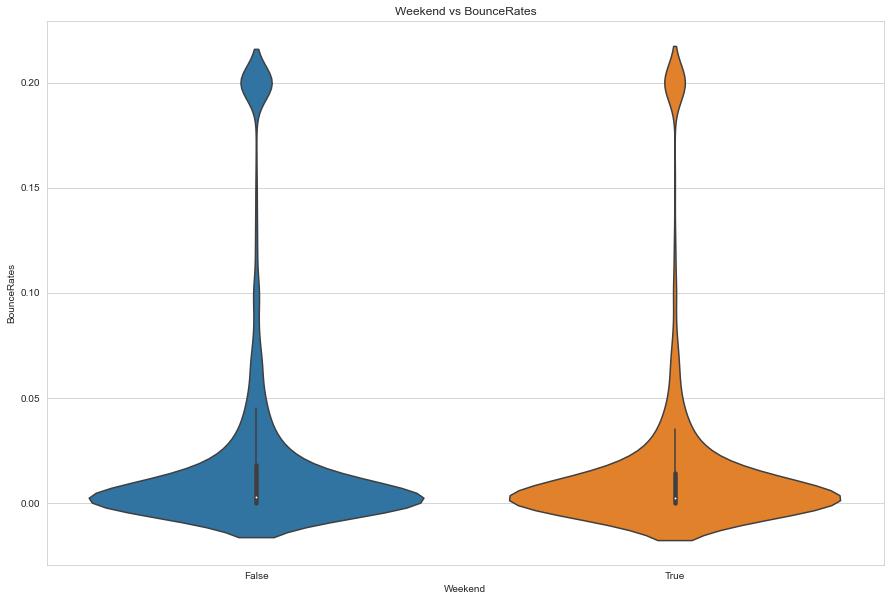

In [64]:
categorical_numeric_plot(df, 'Weekend', 'BounceRates', 'Weekend vs BounceRates')

- Weekdays: The blue violin plot represents “False,” indicating non-weekend days. Bounce rates are mostly concentrated around 0.02, but there is a range extending up to approximately 0.20.
- Weekends: The orange violin plot represents “True,” indicating weekend days. Bounce rates are more evenly distributed, with a peak around 0.10 and a broader distribution compared to non-weekend days.

### Weekend vs ExitRates

In [65]:
categorical_numeric_summary(df, 'ExitRates', 'Weekend')

Weekend,False,True
count,9462.000000,2868.000000
mean,0.044747,0.037549
std,0.049860,0.043728
min,0.000000,0.000000
25%,0.014438,0.012569
50%,0.026498,0.023037
75%,0.050000,0.040654
max,0.200000,0.200000


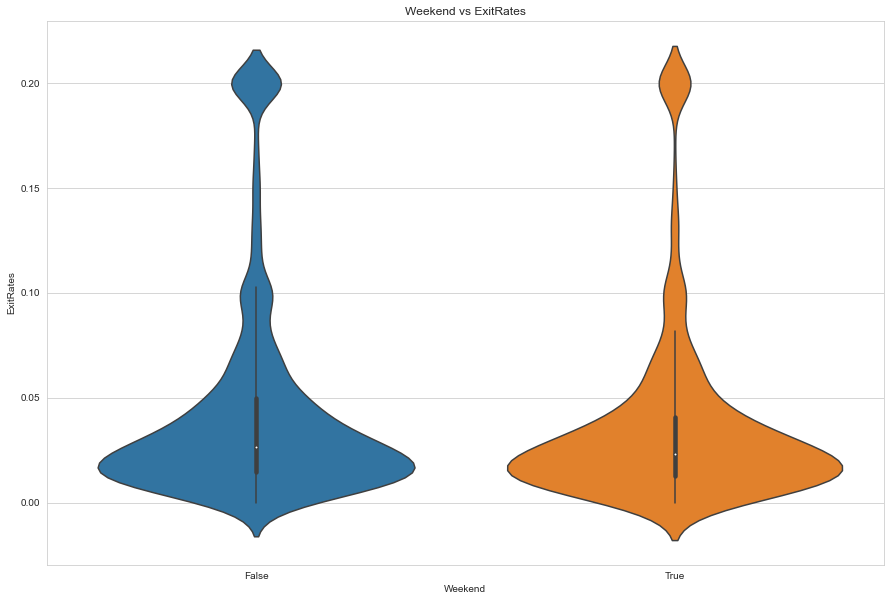

In [66]:
categorical_numeric_plot(df, 'Weekend', 'ExitRates', 'Weekend vs ExitRates')

- Weekdays: The blue violin plot represents “False,” indicating non-weekend days. Exit rates are mostly concentrated around 0.02, but there is a range extending up to approximately 0.20.
- Weekends: The orange violin plot represents “True,” indicating weekend days. Exit rates are more evenly distributed, with a peak around 0.10 and a broader distribution compared to non-weekend days.

### Month vs SpecialDay

In [67]:
categorical_numeric_summary(df, 'SpecialDay', 'Month')

Month,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep
count,433.0,1727.0,184.000000,432.0,288.0,1907.0,3364.000000,2998.0,549.0,448.0
mean,0.0,0.0,0.233696,0.0,0.0,0.0,0.212366,0.0,0.0,0.0
std,0.0,0.0,0.312849,0.0,0.0,0.0,0.324757,0.0,0.0,0.0
min,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
25%,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
50%,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
75%,0.0,0.0,0.400000,0.0,0.0,0.0,0.400000,0.0,0.0,0.0
max,0.0,0.0,1.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0


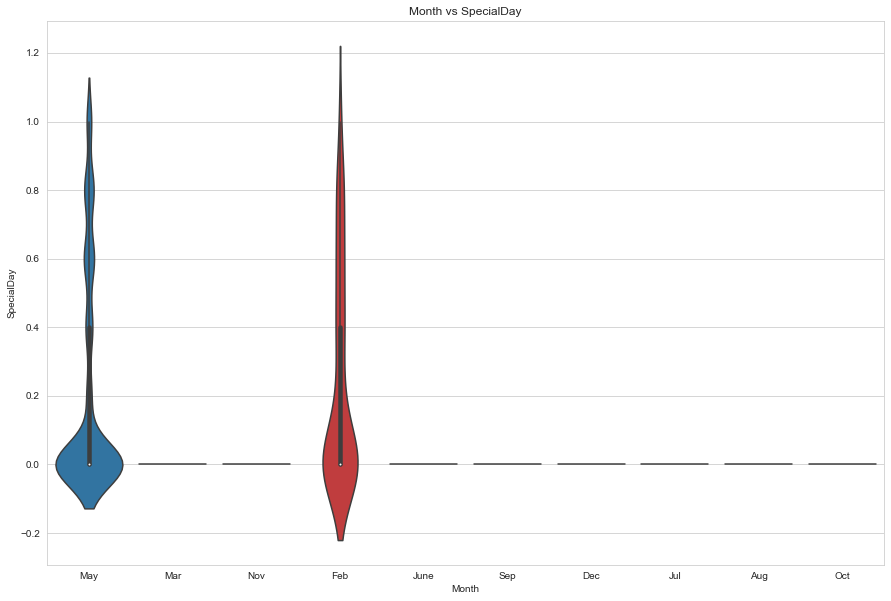

In [68]:
categorical_numeric_plot(df, 'Month', 'SpecialDay', 'Month vs SpecialDay')

- May: The blue shape corresponds to the month of May. It indicates a higher density of special days during May.
- February: The red shape corresponds to the month of February. Similar to May, February also has a notable concentration of special days.
- Other months (Mar, Nov, June, Sep, Dec, Jul, Aug, Oct) appear to have no significant special day patterns.

### Correlation Analysis

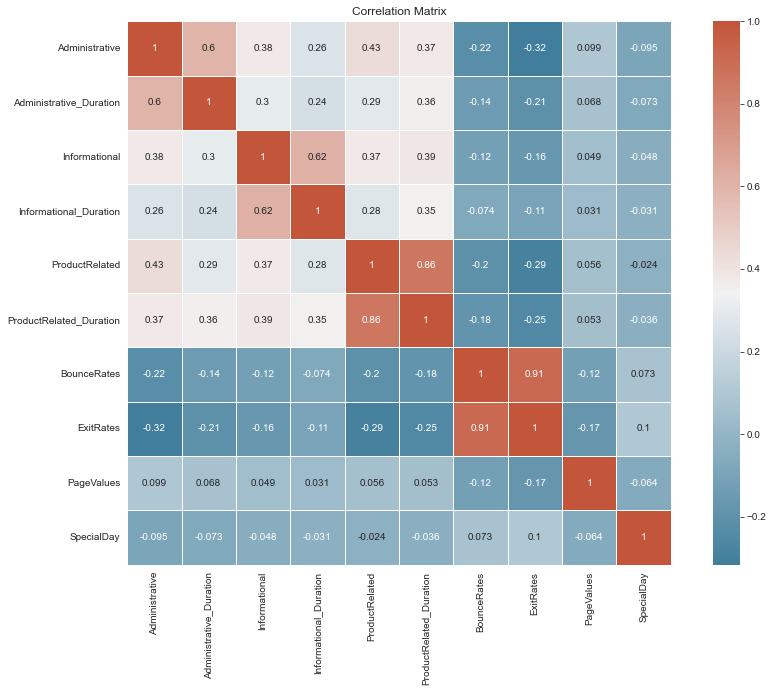

In [69]:
# Create a correlation matrix
numeric_columns = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
numeric_df = df[numeric_columns]

plt.figure(figsize=(15,10))
# Plot title
plt.title("Correlation Matrix")

# Compute the correlation matrix
corr = numeric_df.corr()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask
sns.heatmap(corr, annot=True, linewidths=.5, cmap=cmap, square = True)

# Display the plot
plt.show()

- The correlation matrix is a powerful tool that summarizes the relationships between multiple variables. Each cell in the matrix represents the correlation coefficient between two specific variables
- The correlation coefficient between **BounceRates** and **ExitRates** is the highest with value being 0.91. This strong positive correlation implies that when bounce rates increase, exit rates also tend to increase significantly.
- The correlation coefficient between **ProductRelated** and **ProductRelated_Duration** is also high with value being 0.86. This strong positive correlation implies that when ProductRelated increase, ProductRelated_Duration also tend to increase significantly.

# Pre-Clustering Data Preparation

In [70]:
# Store the dataframe before data preparation
df_old = df

## Data Cleaning

In [71]:
# Drop duplicate rows - 125 duplicate records
df = df.drop_duplicates()
df.shape

#store df in df_unique
df_unique = df

## Feature Selection

In [72]:
# Drop the features
df = df.drop(columns = ['ExitRates','ProductRelated_Duration','Informational','Informational_Duration'])

- Drop the features with high correlations - 'ExitRates','ProductRelated_Duration'.
- Features 'Informational' and 'Informational_Duration' have most of the values as 0, hence we can drop these features as it will not contribute much in the analysis.

## Data Transformation

In [73]:
# Map the Weekend column to binary values
df['Weekend'] = df['Weekend'].map({False: 0,True: 1})

# Get dummy variables for the 'Month' column
dummies_month = pd.get_dummies(df['Month'])

# Get dummy variables for the 'VisitorType' column
dummies_visitor_type = pd.get_dummies(df['VisitorType'])

# Concatenate the dummy columns with the original DataFrame
df = pd.concat([df, dummies_month, dummies_visitor_type], axis=1)

# Drop the original categorical columns
df.drop({'Month', 'VisitorType'}, axis=1, inplace=True)

# Set display options
pd.set_option('display.max_columns', None)

df

,Administrative,Administrative_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep,New_Visitor,Other,Returning_Visitor
0,0,0.00,8,0.000000,53.474571,0.0,1,1,1,2,1,0,0,0,0,0,0,1,0,0,0,1,0,0
1,0,0.00,14,0.014286,0.000000,0.0,2,2,4,2,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,4,37.50,4,0.000000,0.000000,0.0,2,2,9,2,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,4,115.70,16,0.000000,0.000000,0.0,1,1,2,3,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,1,60.00,26,0.000000,0.000000,0.0,2,2,3,4,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,148.00,8,0.000000,0.000000,0.0,2,2,1,3,1,0,0,0,0,0,1,0,0,0,0,0,0,1
12326,1,9.00,23,0.007692,0.000000,0.0,2,2,7,2,0,0,0,0,0,0,0,0,1,0,0,0,0,1
12327,0,0.00,91,0.010000,0.000000,0.0,2,2,1,13,0,0,0,0,1,0,0,0,0,0,0,0,0,1
12328,0,0.00,38,0.016117,0.000000,1.0,2,6,3,6,1,0,0,0,0,0,0,1,0,0,0,0,0,1


In [74]:
# import modules
from sklearn.preprocessing import StandardScaler

num_col = ['Administrative_Duration', 'BounceRates', 'PageValues']
# creates a copy of the original DataFrame (df) and assigns it to a new variable X_std
X_std = df.copy()
# Fit the dataframe using standard scaler
X_std[num_col] = StandardScaler().fit_transform(X_std[num_col])
X_std

,Administrative,Administrative_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep,New_Visitor,Other,Returning_Visitor
0,0,-0.460019,8,-0.450137,2.547860,0.0,1,1,1,2,1,0,0,0,0,0,0,1,0,0,0,1,0,0
1,0,-0.460019,14,-0.134456,-0.318962,0.0,2,2,4,2,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,4,-0.248733,4,-0.450137,-0.318962,0.0,2,2,9,2,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,4,0.191868,16,-0.450137,-0.318962,0.0,1,1,2,3,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,1,-0.121962,26,-0.450137,-0.318962,0.0,2,2,3,4,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,0.373856,8,-0.450137,-0.318962,0.0,2,2,1,3,1,0,0,0,0,0,1,0,0,0,0,0,0,1
12326,1,-0.409311,23,-0.280155,-0.318962,0.0,2,2,7,2,0,0,0,0,0,0,0,0,1,0,0,0,0,1
12327,0,-0.460019,91,-0.229160,-0.318962,0.0,2,2,1,13,0,0,0,0,1,0,0,0,0,0,0,0,0,1
12328,0,-0.460019,38,-0.093984,-0.318962,1.0,2,6,3,6,1,0,0,0,0,0,0,1,0,0,0,0,0,1


# Cluster Modeling

### Hierarchial Clustering + Dendrogram

Text(0.5, 1.0, 'Dendogram for transformed data')

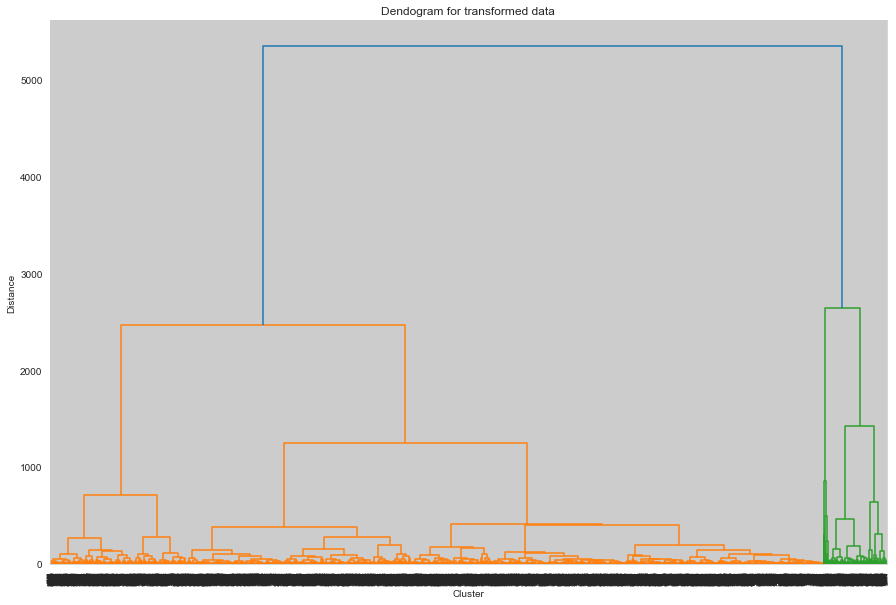

In [75]:
# import library
from scipy.cluster import hierarchy
# create a new figure (fig) and a set of axes (ax) with a specified size to accommodate the dendrogram.
fig, ax = plt.subplots(figsize=(15, 10))
# Calculate the hierarchical clustering linkage for the scaled data (X_std) using Ward's method. 
dend = hierarchy.dendrogram(
    hierarchy.linkage(X_std, method="ward") # Ward's method minimizes the variance within clusters.
)
# Add title and labels for the plot
plt.xlabel('Cluster')
plt.ylabel('Distance')
plt.title('Dendogram for transformed data')

- By tracing the horizontal lines (dendrogram branches) upwards from the bottom, we can see how data points are progressively merged into a smaller number of clusters. 
- Counting the number of branches that remain at a certain height level indicates the corresponding number of clusters at that level.
- Number of clusters = 2

## Elbow + Silhouette Plots

array([[<AxesSubplot:xlabel='k'>, <AxesSubplot:xlabel='k'>],
       [<AxesSubplot:xlabel='k'>, <AxesSubplot:xlabel='k'>]], dtype=object)

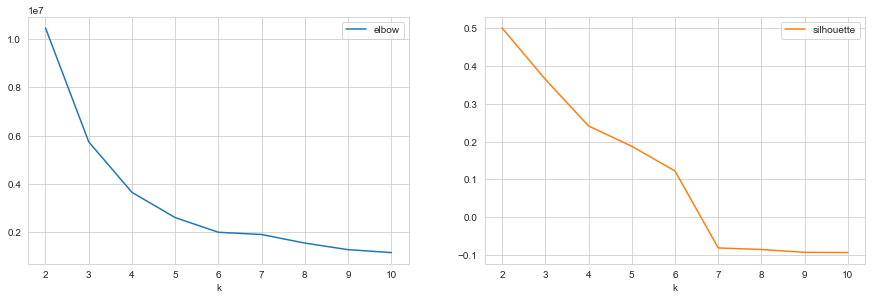

In [77]:
# import libraries
from sklearn.cluster import KMeans
from sklearn import metrics
elbow = []
sils = []
# Create a list sizes containing values from 2 to 11, representing the range of cluster numbers (k) to be evaluated.
sizes = range(2, 11)
for k in sizes:
    # Create KMeans object (k2) with the specified number of clusters
    k2 = KMeans(random_state=56, n_clusters=k)
    # Fit the KMeans model to the scaled data
    k2.fit(X_std)
    # Evaluate the clustering using the WCSS (Within-Cluster Sum of Squares)
    elbow.append(k2.inertia_)
    # Calculate the silhouette score for the current clustering solution 
    sils.append(
        metrics.silhouette_score(df, k2.labels_) # Silhouette score measures how well data points are assigned to their clusters compared to neighboring clusters. 
    )

fig, ax = plt.subplots(figsize=(15, 10))
(
    pd.DataFrame(
        {
            "elbow": elbow,
            "silhouette": sils,
            "k": sizes,
        }
    )
    .set_index("k")
    .plot(ax=ax, subplots=True, layout=(2, 2))
)

- Lower WCSS indicates better clustering.
- Silhouette Scores closer to 1 indicate better separation.
- From elbow plot, there isn't a very sharp or distinct bend in the curve that would be a classic "elbow" point. However, the number of clusters if considered can be taken as 3
- The most stable silhouette score is achieved around k=4 or k=5.
- The silhouette score remains stable within this range, indicating that the data points are well-separated into these k values. 

In [78]:
# Create a KMeans model with 2 clusters
km = KMeans(n_clusters=2)
# Fit the model to the standardized data
km.fit(X_std)
# Predict cluster labels for each data point in X_std
labels = km.predict(X_std)
# Assign cluster labels to the original DataFrame and group data by cluster
clustered_df =(
    df.assign(cluster=labels)
    .groupby("cluster")
    .agg(["mean", "var"])
    .T
)
# Print the clustered DataFrame
print(clustered_df)

cluster                                  0             1
Administrative          mean      2.028899      5.973931
                        var       8.679734     25.060906
Administrative_Duration mean     72.167446    192.803310
                        var   25981.104406  82932.880731
ProductRelated          mean     22.053263    149.224192
                        var     380.150920   5953.301460
BounceRates             mean      0.021602      0.005932
                        var       0.002200      0.000044
PageValues              mean      5.846406      7.159404
                        var     348.932384    335.312182
SpecialDay              mean      0.063294      0.046090
                        var       0.040547      0.031652
OperatingSystems        mean      2.123155      2.136601
                        var       0.852506      0.468795
Browser                 mean      2.364041      2.284672
                        var       3.012149      1.892781
Region                  mean   

# Post-Clustering Exploratory Data Analysis

<AxesSubplot:>

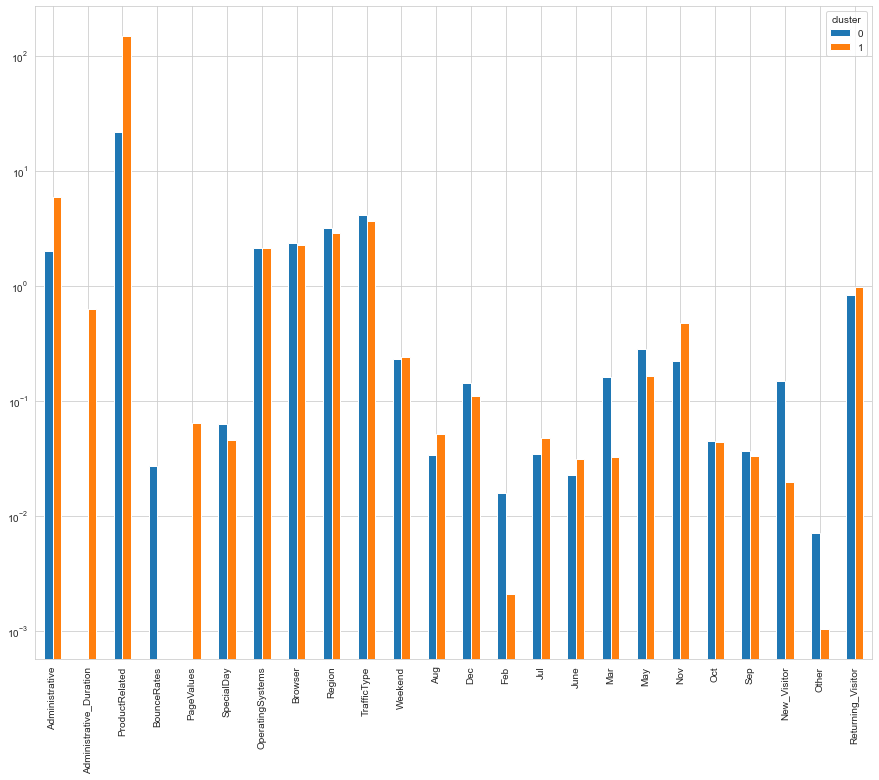

In [79]:
# Create a figure and subplots for visualization
fig, ax = plt.subplots(figsize=(15, 12))
(
    X_std.assign(cluster=labels)
    .groupby("cluster") # Group data by cluster
    .mean() # Calculate mean values for each feature within each cluster
    # Create a bar plot to visualize the mean values across features for each cluster
    .T.plot.bar(ax=ax, logy = True)
)

<AxesSubplot:>

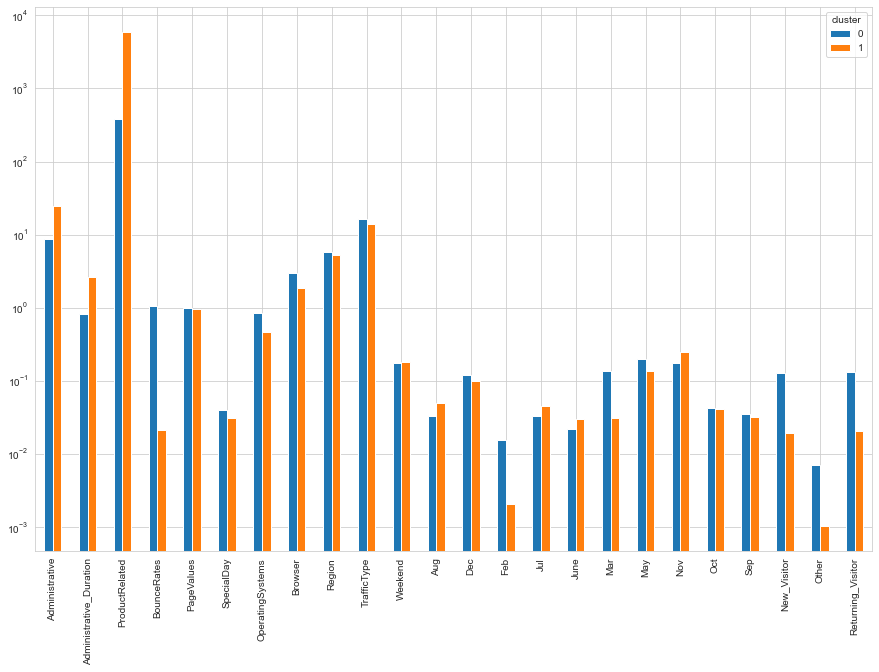

In [80]:
# Create a figure and subplots for visualization
fig, ax = plt.subplots(figsize=(15, 10))
# Calculate variance for each feature within each cluster
(
    X_std.assign(cluster=labels)
    .groupby("cluster")  # Group data by cluster
    .var() # Calculate variance for each feature within each cluster
    # Create a bar plot to visualize the variances
    .T.plot.bar(ax=ax, logy = True)
)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

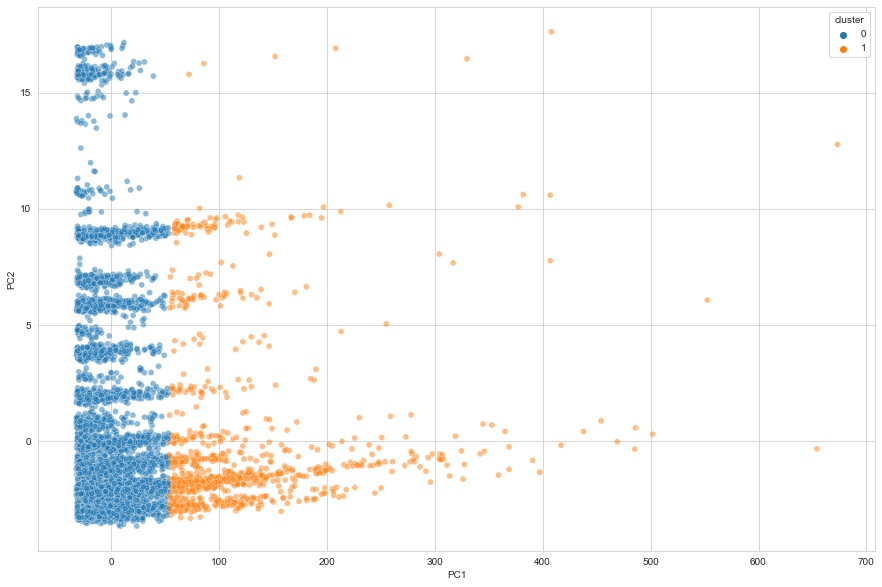

In [81]:
# Import libraries for dimensionality reduction and visualization
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Create a figure and subplots for visualization
fig, ax = plt.subplots(figsize=(15, 10))
# Create a PCA object with a fixed random state for reproducibility
pca = PCA(random_state=42)
# Apply PCA transformation to the standardized data
X_pca = pca.fit_transform(
    X_std
)
# Create a scatterplot using seaborn (sns)
sns.scatterplot(
    "PC1", # X-axis: First principal component
    "PC2", # Y-axis: Second principal component
    data=X_std.assign(
        PC1=X_pca[:, 0], # First principal component
        PC2=X_pca[:, 1], # Second principal component
        cluster=labels, # Add cluster labels from KMeans
    ),
    hue="cluster",
    alpha=0.5, # Set transparency for overlapping points
    ax=ax,
)

- Analysing and plotting the cluster points using two principal component points, gives us a separating line for two clusters. So, we can say that our model is able to identify clusters in a good manner.

In [82]:
# Create a copy of the standardized data
df_new = X_std.copy()
# Add a new column named "cluster" containing KMeans cluster labels
df_new = X_std.assign(cluster=labels)
# Print the updated DataFrame to view the results
df_new

,Administrative,Administrative_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep,New_Visitor,Other,Returning_Visitor,cluster
0,0,-0.460019,8,-0.450137,2.547860,0.0,1,1,1,2,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,0,-0.460019,14,-0.134456,-0.318962,0.0,2,2,4,2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,4,-0.248733,4,-0.450137,-0.318962,0.0,2,2,9,2,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,4,0.191868,16,-0.450137,-0.318962,0.0,1,1,2,3,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,1,-0.121962,26,-0.450137,-0.318962,0.0,2,2,3,4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,0.373856,8,-0.450137,-0.318962,0.0,2,2,1,3,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
12326,1,-0.409311,23,-0.280155,-0.318962,0.0,2,2,7,2,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
12327,0,-0.460019,91,-0.229160,-0.318962,0.0,2,2,1,13,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
12328,0,-0.460019,38,-0.093984,-0.318962,1.0,2,6,3,6,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [83]:
# Count the occurrences of each cluster label in the "cluster" column
df_new['cluster'].value_counts()

0    11246
1      959
Name: cluster, dtype: int64

In [84]:
# Calculate summary statistics for each cluster
summary_stats = df_new.assign(cluster=labels).groupby("cluster").describe().T
summary_stats

cluster                             0           1
Administrative    count  11246.000000  959.000000
                  mean       2.028899    5.973931
                  std        2.946139    5.006087
                  min        0.000000    0.000000
                  25%        0.000000    2.000000
...                               ...         ...
Returning_Visitor min        0.000000    0.000000
                  25%        1.000000    1.000000
                  50%        1.000000    1.000000
                  75%        1.000000    1.000000
                  max        1.000000    1.000000

[192 rows x 2 columns]

In [85]:
# Generic function to create scatter plot
def transformed_scatter_plot(dataframe, x_column, y_column, title):
    """
    This function creates a scatter plot to visualize the relationship between two numerical variables,
    colored by the cluster labels in the provided DataFrame.

    Args:
      dataframe (pandas.DataFrame): The DataFrame containing the data for the plot.
      x_column (str): The name of the column containing the data for the x-axis.
      y_column (str): The name of the column containing the data for the y-axis.
      title (str): The title for the scatter plot.
    """
    plt.figure(figsize = (15,10))
    # Create a scatter plot
    sns.scatterplot(x=x_column, y=y_column, hue = 'cluster', data = dataframe)
     # Add labels and title
    plt.title(title)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.grid(True)
    # Show the plot
    plt.show()

# Generic function to create cat plot
def transformed_cat_plot(dataframe, x_column, title):
    """
      Creates a categorical plot (count plot) to visualize the distribution of a categorical variable
      across different clusters within a DataFrame.

      Args:
          dataframe (pandas.DataFrame): The DataFrame containing the data for the plot.
          x_column (str): The name of the column containing the categorical data to visualize.
          title (str): The title for the categorical plot.
     """
    plt.figure(figsize = (15,10))
    # Create a catplot
    sns.catplot(x=x_column, hue='cluster', data=dataframe , kind ='count')
    # Add labels and title
    plt.xlabel(x_column)
    plt.title(title)
    # Show the plot
    plt.show()

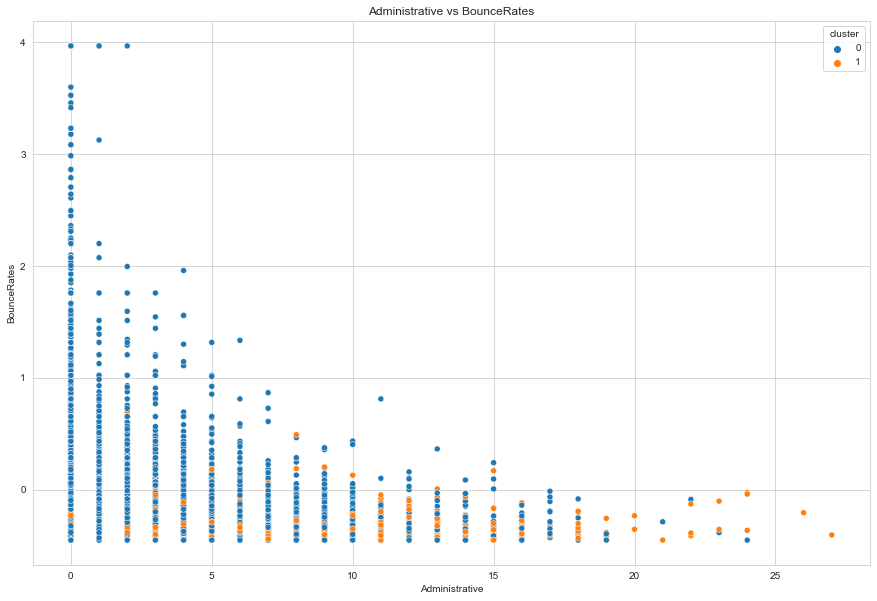

In [86]:
transformed_scatter_plot(df_new, 'Administrative', 'BounceRates', "Administrative vs BounceRates")

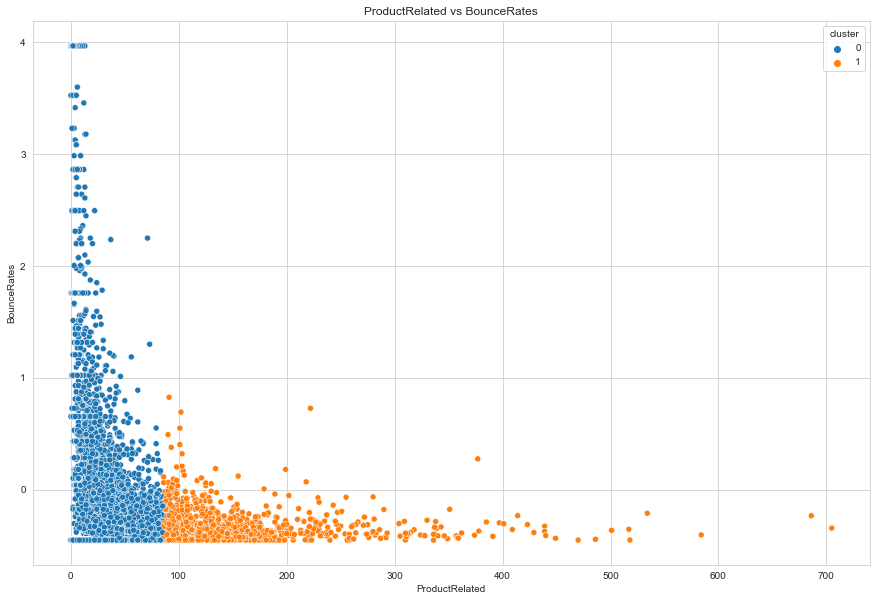

In [87]:
transformed_scatter_plot(df_new, 'ProductRelated', 'BounceRates', "ProductRelated vs BounceRates")

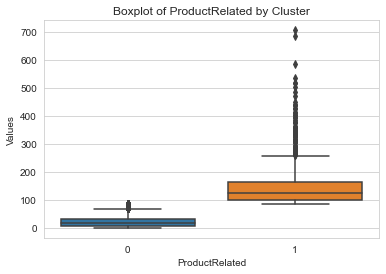

In [88]:
# Create a box plot using seaborn
sns.boxplot(data=df_new, x='cluster', y='ProductRelated')
# Add a title and labels for better understanding
plt.title("Boxplot of ProductRelated by Cluster")
plt.xlabel("ProductRelated")
plt.ylabel("Values")
# Display the plot
plt.show()

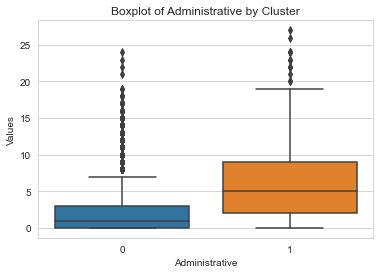

In [89]:
# Create a box plot using seaborn
sns.boxplot(data=df_new, x='cluster', y='Administrative')
# Add a title and labels for better understanding
plt.title("Boxplot of Administrative by Cluster")
plt.xlabel("Administrative")
plt.ylabel("Values")
# Display the plot
plt.show()

<Figure size 1080x720 with 0 Axes>

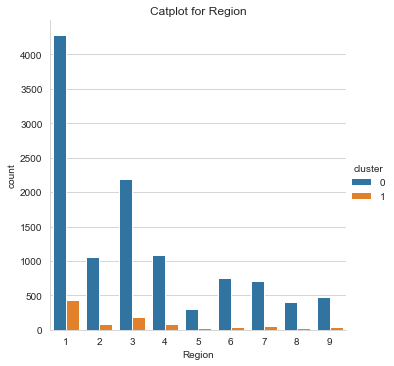

In [90]:
transformed_cat_plot(df_new, 'Region', "Catplot for Region")

<Figure size 1080x720 with 0 Axes>

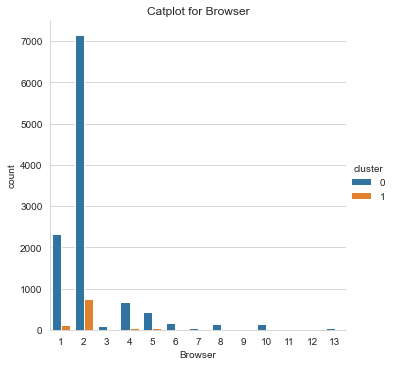

In [91]:
transformed_cat_plot(df_new, 'Browser', "Catplot for Browser")

# Clustering Output vs. Actual Labels

In [92]:
# Read csv for label data and store it in dataframe
df_label = pd.read_csv("https://raw.githubusercontent.com/mimam786/DAV-6150/main/Project2/Project2_Data_Labels.csv")
df_label

,Revenue
0,True
1,False
2,False
3,False
4,False
...,...
12325,False
12326,False
12327,False
12328,False


In [93]:
# Assign cluster labels to 'Revenue'
df_new['Revenue'] = df_new['cluster']
# Drop extra column
df_new = df_new.drop(columns = ['cluster'])
# Print the modified DataFrame
df_new

,Administrative,Administrative_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep,New_Visitor,Other,Returning_Visitor,Revenue
0,0,-0.460019,8,-0.450137,2.547860,0.0,1,1,1,2,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,0,-0.460019,14,-0.134456,-0.318962,0.0,2,2,4,2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,4,-0.248733,4,-0.450137,-0.318962,0.0,2,2,9,2,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,4,0.191868,16,-0.450137,-0.318962,0.0,1,1,2,3,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,1,-0.121962,26,-0.450137,-0.318962,0.0,2,2,3,4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,0.373856,8,-0.450137,-0.318962,0.0,2,2,1,3,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
12326,1,-0.409311,23,-0.280155,-0.318962,0.0,2,2,7,2,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
12327,0,-0.460019,91,-0.229160,-0.318962,0.0,2,2,1,13,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
12328,0,-0.460019,38,-0.093984,-0.318962,1.0,2,6,3,6,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [94]:
# Merge df_new and df_label using their indices
df_final = pd.merge(df_new, df_label, right_index = True, left_index = True, suffixes = ('','2'))
# Rename the column 'Revenue_2' to 'V_Revenue' for clarity
df_final.rename(columns = {'Revenue2':'V_Revenue'}, inplace = True)
# Print the merged DataFrame
df_final

,Administrative,Administrative_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep,New_Visitor,Other,Returning_Visitor,Revenue,V_Revenue
0,0,-0.460019,8,-0.450137,2.547860,0.0,1,1,1,2,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,True
1,0,-0.460019,14,-0.134456,-0.318962,0.0,2,2,4,2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,False
2,4,-0.248733,4,-0.450137,-0.318962,0.0,2,2,9,2,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,False
3,4,0.191868,16,-0.450137,-0.318962,0.0,1,1,2,3,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,False
4,1,-0.121962,26,-0.450137,-0.318962,0.0,2,2,3,4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,0.373856,8,-0.450137,-0.318962,0.0,2,2,1,3,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,False
12326,1,-0.409311,23,-0.280155,-0.318962,0.0,2,2,7,2,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,False
12327,0,-0.460019,91,-0.229160,-0.318962,0.0,2,2,1,13,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,False
12328,0,-0.460019,38,-0.093984,-0.318962,1.0,2,6,3,6,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,False


In [95]:
# Count occurrences of each unique value in the 'Revenue' column
revenue_counts = df_final['Revenue'].value_counts()
# Count occurrences of each unique value in the 'V_Revenue' column
v_revenue_counts = df_final['V_Revenue'].value_counts()

# Print the counts
print("Counts in 'Revenue' column:")
print(revenue_counts)
print("\nCounts in 'V_Revenue' column:")
print(v_revenue_counts)

Counts in 'Revenue' column:
0    11246
1      959
Name: Revenue, dtype: int64

Counts in 'V_Revenue' column:
False    10297
True      1908
Name: V_Revenue, dtype: int64


In [96]:
# Create a contingency table using crosstab
contingency_table = pd.crosstab(df_final['Revenue'], df_final['V_Revenue'])
# Print the contingency table
contingency_table

V_Revenue,False,True
Revenue,,
0,9616,1630
1,681,278


# SVM Modeling

In [97]:
# import the necessary packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.svm import SVC

In [98]:
df_final

,Administrative,Administrative_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep,New_Visitor,Other,Returning_Visitor,Revenue,V_Revenue
0,0,-0.460019,8,-0.450137,2.547860,0.0,1,1,1,2,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,True
1,0,-0.460019,14,-0.134456,-0.318962,0.0,2,2,4,2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,False
2,4,-0.248733,4,-0.450137,-0.318962,0.0,2,2,9,2,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,False
3,4,0.191868,16,-0.450137,-0.318962,0.0,1,1,2,3,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,False
4,1,-0.121962,26,-0.450137,-0.318962,0.0,2,2,3,4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,0.373856,8,-0.450137,-0.318962,0.0,2,2,1,3,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,False
12326,1,-0.409311,23,-0.280155,-0.318962,0.0,2,2,7,2,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,False
12327,0,-0.460019,91,-0.229160,-0.318962,0.0,2,2,1,13,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,False
12328,0,-0.460019,38,-0.093984,-0.318962,1.0,2,6,3,6,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,False


In [99]:
# Split the data into training and test sets
X1 = df_final[['Administrative',
         'Administrative_Duration',
         'ProductRelated',
         'BounceRates',
         'PageValues',
         'SpecialDay']]
y1 = df_final['Revenue']

# Split the data into training and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

######## SVM ########

# Train the SVM model
model1 = SVC()
model1.fit(X1_train, y1_train)

# Make predictions on the test set
y1_pred = model1.predict(X1_test)

In [100]:
# Split the data into training and test sets
X2 = df_final[['Administrative_Duration',
         'BounceRates',
         'PageValues',
         'Browser',
         'Region',
         'TrafficType']]
y2 = df_final['Revenue']

# Split the data into training and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=64)

######## SVM ########

# Train the SVM model
model2 = SVC()
model2.fit(X2_train, y2_train)

# Make predictions on the test set
y2_pred = model2.predict(X2_test)

# Select Models

In [101]:
# Generic function for calculting metrics
# Import the necessary packages
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
def metrics(actual, predicted):
    # Scikit-learn functions
    # Accuracy
    accuracy_sklearn = accuracy_score(actual, predicted)
    # Precision
    precision_sklearn = precision_score(actual, predicted)
    # Sensitivity
    sensitivity_sklearn = recall_score(actual, predicted)  # Recall is equivalent to sensitivity
    # Specificity
    specificity_sklearn = recall_score(actual, predicted, pos_label=0)  # Specificity is calculated for the negative class
    # F1 Score
    f1_score_sklearn = f1_score(actual, predicted)
    # Classification report
    classification_report_sklearn = classification_report(actual, predicted)
    # Print all the metrics
    print("Accuracy:", round(accuracy_sklearn*100,2), "%")
    print("Precision:", round(precision_sklearn*100,2), "%")
    print("Sensitivity (Recall):", round(sensitivity_sklearn*100,2), "%")
    print("Specificity:", round(specificity_sklearn*100,2), "%")
    print("F1 Score:", round(f1_score_sklearn*100,2), "%")
    print("\nClassification Report:\n")
    print(classification_report_sklearn)
    
def print_confusion_matrix_info(conf_matrix):
    TN, FP, FN, TP = conf_matrix.ravel()
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Negatives (TN): {TN}")

### Model 1

In [102]:
# Confusion matrix for model 1
conf_matrix_model1 = confusion_matrix(y1_test, y1_pred)
print_confusion_matrix_info(conf_matrix_model1)

True Positives (TP): 168
False Positives (FP): 0
False Negatives (FN): 2
True Negatives (TN): 2271


**True Positives (TP):** 168: This indicates the model correctly identified 168 actual purchases in the test data. This is a positive sign, suggesting the SVM's decision boundary now captures a significant portion of the purchase data points on the positive side.

**False Positives (FP):** 0: This shows the model made no mistakes by predicting a purchase (positive) when it wasn't (negative).

**False Negatives (FN):** 2: This is a significant improvement, with the model only missing 2 actual purchases. This suggests the SVM's decision boundary has become more effective in separating the classes.

**True Negatives (TN):** 2271: This shows the model correctly identified 2271 non-purchases (negative cases). This number is high, but its significance depends on the class imbalance.

In [103]:
# Metrics for model 1
metrics(y1_test, y1_pred)

Accuracy: 99.92 %
Precision: 100.0 %
Sensitivity (Recall): 98.82 %
Specificity: 100.0 %
F1 Score: 99.41 %

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2271
           1       1.00      0.99      0.99       170

    accuracy                           1.00      2441
   macro avg       1.00      0.99      1.00      2441
weighted avg       1.00      1.00      1.00      2441



**Accuracy (99.92%):** This signifies a very high proportion of correctly classified instances (both purchases and non-purchases) in the test data. For SVMs, this suggests the model effectively created a separation hyperplane that accurately divides the purchase and non-purchase data points in the feature space.

**Precision (100.0%):** This metric focuses on the positive predictions (purchases). A perfect score of 100% means all the positive predictions made by the model were actually correct purchases (no false positives). In SVM terms, this indicates the model isn't making any mistakes when classifying data points that fall on the positive side of the hyperplane.

**Sensitivity (Recall) (98.82%):** This metric highlights how well the model identifies all positive cases (purchases) in the test set. A score of 98.82% signifies the model captured a very high percentage of actual purchases, missing only a small fraction (around 1.18%). This suggests the SVM effectively classifies most data points belonging to the positive class, even if they are close to the decision boundary.

**Specificity (100.0%):** This metric looks at the negative predictions (non-purchases). A perfect score of 100% means the model correctly identified all the negative cases (no false negatives). In SVM terms, this indicates the model isn't making any mistakes when classifying data points that fall on the negative side of the hyperplane.

**F1 Score (99.41%):** This metric is a harmonic mean between precision and recall. A score of 99.41% indicates a strong balance between these two aspects, suggesting the model excels at both minimizing false positives and capturing true positives. This is desirable for SVMs, as it ensures the model performs well on both positive and negative classifications.

Overall, these metrics suggest that your SVM model has learned a very effective decision boundary to separate purchase and non-purchase data points. 

In [104]:
# Cross validation for model 1
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
scores_model1 = cross_validate(model1, X1_train, y1_train, cv=10, scoring=scoring)

# Print the cross-validation scores
for key, scores in scores_model1.items():
    print(key + ':', round(scores.mean(),4)) 

fit_time: 0.0646
score_time: 0.0223
test_accuracy: 0.9993
test_precision_macro: 0.9996
test_recall_macro: 0.9956
test_f1_macro: 0.9976


**fit_time:** This represents the time (in seconds) it took to train the model. A value of 0.0646 seconds suggests very fast training, which is a positive aspect, especially for large datasets.

**score_time:** This represents the time (in seconds) it took to evaluate the model's performance on the test set. Here too, 0.0223 seconds indicates fast evaluation, making the model efficient for making predictions.

**test_accuracy: 0.9993** - This metric reflects a very high proportion of correctly classified instances (both purchases and non-purchases) in the test data. For an SVM model, this suggests it successfully created a decision boundary that accurately separates the purchase and non-purchase data points in the feature space.

**test_precision_macro: 0.9996** - This considers the average precision across all classes (purchase and non-purchase). A value of 0.9996 suggests high precision, implying the model rarely makes false positive predictions (identifying non-purchases as purchases).

**test_recall_macro: 0.9956** - This focuses on the average ability of the model to identify all positive cases (purchases) in the test set. A value of 0.9889 indicates the model captures most actual purchases, although it might have missed a small percentage (around 1.11%).

**test_f1_macro: 0.9976** - This metric provides a balanced view of both precision and recall. A score of 0.9976 suggests a strong balance between these aspects for the SVM model.

The training and evaluation times indicate a very efficient model. The high accuracy and macro-averaged metrics suggest good overall performance on the test set. 

### Model 2

In [105]:
# Confusion matrix for model 2
conf_matrix_model2 = confusion_matrix(y2_test, y2_pred)
print_confusion_matrix_info(conf_matrix_model2)

True Positives (TP): 0
False Positives (FP): 0
False Negatives (FN): 198
True Negatives (TN): 2243


**True Positives (TP): 0** - This indicates the model completely missed all actual purchases in the test data. For an SVM, this suggests the decision boundary it created in the feature space completely separates the purchase data points from the positive side, potentially placing them all on the wrong side of the boundary.

**False Positives (FP): 0** - This shows the model made no mistakes by predicting a purchase (positive) when it wasn't (negative).

**False Negatives (FN): 198** - This is a high number, indicating the model missed 202 actual purchases. This is a significant concern and suggests the SVM might have like overfitting and poor feature selection.

**True Negatives (TN): 2243** - This shows the model correctly identified 2239 non-purchases (negative cases). While a high number, it's less informative considering the potential class imbalance.

In [106]:
# Metrics for model 2
metrics(y2_test, y2_pred)

Accuracy: 91.89 %
Precision: 0.0 %
Sensitivity (Recall): 0.0 %
Specificity: 100.0 %
F1 Score: 0.0 %

Classification Report:

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2243
           1       0.00      0.00      0.00       198

    accuracy                           0.92      2441
   macro avg       0.46      0.50      0.48      2441
weighted avg       0.84      0.92      0.88      2441



**Accuracy (91.89%):** This seems like a high accuracy, but it's misleading in this case. The model is only classifying the majority class (non-purchases) correctly, leading to a high overall accuracy but failing in its intended purpose.

**Precision: (0.0%)** This metric focuses on the positive predictions (purchases). A score of 0% indicates the model is always wrong when predicting a purchase. This suggests the SVM's decision boundary completely excludes purchase data points on the positive side.

**Specificity (100.0%):** This metric looks at correctly identified negative cases (non-purchases). A perfect score of 100% shows the model is classifying all non-purchases correctly. However, it's irrelevant considering the complete lack of true positives.

**Sensitivity (Recall) (0.0%):** This highlights the ability to identify positive cases (purchases). A score of 0% signifies the model is completely missing all actual purchases in the test set. This is a major problem for an SVM model aiming to predict purchases.

**F1 Score (0.0%):** This metric is a harmonic mean between precision and recall. A score of 0% indicates an utter lack of balance between these aspects. The model prioritizes non-purchases so much that it fails to identify any purchases at all.

The metrics paint a picture of an SVM model that's completely biased towards the majority class (non-purchase). It fails to identify any actual purchases, rendering it unusable for its intended purpose.

In [107]:
# Cross validation for model 2
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
scores_model2 = cross_validate(model2, X2_train, y2_train, cv=10, scoring=scoring)

# Print the cross-validation scores
for key, scores in scores_model2.items():
    print(key + ':', round(scores.mean(),4)) 

fit_time: 1.4122
score_time: 0.2019
test_accuracy: 0.922
test_precision_macro: 0.461
test_recall_macro: 0.4999
test_f1_macro: 0.4797


**fit_time:** This represents the time (in seconds) it took to train the model. A value of 1.4122 seconds suggests very fast training, which is a positive aspect, especially for large datasets.

**score_time:** This represents the time (in seconds) it took to evaluate the model's performance on the test set. Here too, 0.2019 seconds indicates fast evaluation, making the model efficient for making predictions.

**test_accuracy: 0.922** - This accuracy is lower than the previous analysis (possibly with perfect accuracy due to class imbalance). While it seems lower, it might be a more realistic representation of the model's performance on unseen data, especially if class imbalance has been addressed.

**test_precision_macro: 0.461** - This suggests an average precision of around 46% for both classes (purchase and non-purchase). This indicates the model is making some correct positive predictions (identifying purchases) but also has a significant number of false positives or false negatives.

**test_recall_macro: 0.4999** - This reflects an average ability of around 50% to identify all cases (purchases and non-purchases) in the test set. While not ideal, it's an improvement compared to missing all purchases entirely.

**test_f1_macro: 0.4797** - This balanced F1 score suggests a moderate balance between precision and recall for the SVM model.

### Model Comparison and Selection

- Model 1 excels at correctly classifying both purchases and non-purchases and makes very few mistakes when predicting purchases (almost no false positives) and identifies a large portion of actual purchases (low false negatives).

- Model 2, on the other hand, completely fails to identify any purchases.

- Therefore, Model 1 is the better choice, but with some reservations.

# Clustering + SVM Output vs. Actual Labels

In [108]:
# Assign 'Revenue' column from df_final to V_Revenue
V_Revenue = df_final['Revenue']
# Create a new DataFrame named 'new_Df'
new_Df = pd.DataFrame({'Revenue':y1_test, 'V_Revenue':V_Revenue[X1_test.index]})
# Print the first few rows of the new DataFrame
new_Df.head()

,Revenue,V_Revenue
5989,0,0
7713,0,0
201,0,0
10448,0,0
1155,0,0


In [109]:
# Metrics for final comparison of predicted and actual label
metrics(new_Df['V_Revenue'], y1_pred)

Accuracy: 99.92 %
Precision: 100.0 %
Sensitivity (Recall): 98.82 %
Specificity: 100.0 %
F1 Score: 99.41 %

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2271
           1       1.00      0.99      0.99       170

    accuracy                           1.00      2441
   macro avg       1.00      0.99      1.00      2441
weighted avg       1.00      1.00      1.00      2441



# Conclusion

Based on the metrics for the two SVM models, we can make the following observations and comparisons:

- **Accuracy:** The SVM model with the numerical scaled dataset (Model 1) has the highest accuracy of 99.92%, followed by the SVM model with the numerical + categorical scaled dataset (Model 2) at 91.89%. This indicates the model excels at correctly classifying both purchases and non-purchases.

- **Precision:** The SVM model with the numerical scaled dataset (Model 1) has the highest precision of 100%, indicating the model makes very few mistakes when predicting purchases (almost no false positives) and identifies a large portion of actual purchases (low false negatives)., followed by the SVM model with the numerical + categorical scaled dataset (Model 2) at 0%, where metrics reflect a significant number of misclassifications.

- **Sensitivity (Recall):** The SVM model with the numerical scaled dataset (Model 1) has the highest sensitivity of 98.82%, followed by the SVM model with the numerical + categorical scaled dataset (Model 2) at 0%. A high sensitivity indicates a low false negative rate.

- **Specificity:** Both the models have specificity of 100%. A high specificity indicates a low false positive rate for the negative class.

- **F1 Score:**  The SVM model with the numerical scaled dataset (Model 1) has the highest F1 score of 99.41%, followed by the SVM model with the numerical + categorical scaled dataset (Model 2) at 0%. The F1 score is a balanced measure that considers both precision and recall.

Model 1 exhibits significantly better performance than Model 2 for predicting purchase behavior based on the provided metrics. Hence Model 1 is the better choice for purchase prediction based on its high accuracy, precision, recall, and F1 score.

AS per the analysis, both the models are not good for purchase predictions, may be due to poor feature selection and hence the models can be imrpoved for better predictability.

# References

- https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
- https://towardsdatascience.com/understanding-support-vector-machine-part-2-kernel-trick-mercers-theorem-e1e6848c6c4d